### This notebook does the following
* Read in (or initiate) phase info
* Read in and process pressure field
* Compare pressure input to net energy growth
* Plot pressure contour
* Find phase different

In [121]:
from prepare import load_object, save_object
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import ticker
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import FuncFormatter, MultipleLocator
from coordinate import array_newcoord
from scipy.signal import savgol_filter

#### Setting colormap
https://www.py4u.net/discuss/222050

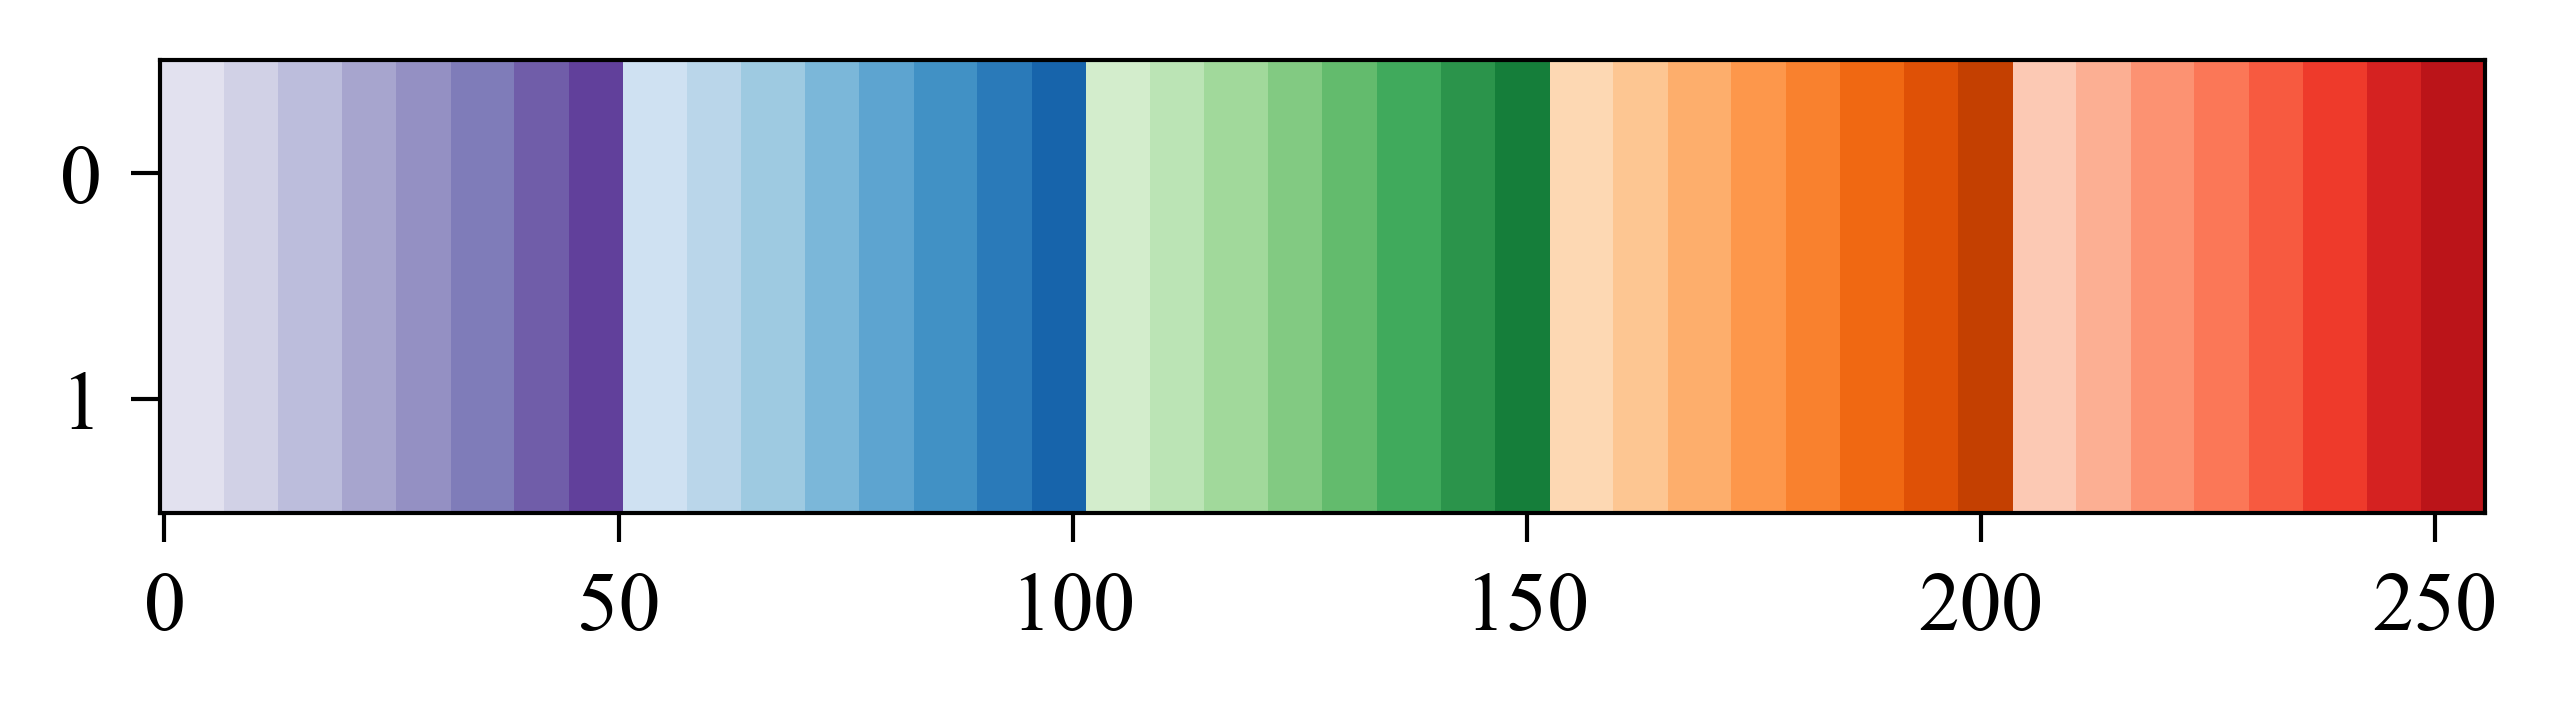

In [122]:
N = 8 # number of colors to extract from each of the base_cmaps below
base_cmaps = ['Purples','Blues','Greens','Oranges','Reds',]

n_base = len(base_cmaps)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.2,0.8,N)) for name in base_cmaps])
cmap = mpl.colors.ListedColormap(colors) 

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cmap)

In [123]:
# ak = 0.05
(case13.cc,case14.cc) = cmap((6,3))
(case13.marker,case14.marker) = ('s','s')
# ak = 0.1
(case4.cc, case5.cc, case6.cc) = cmap((13,11,9))
(case4.marker, case5.marker, case6.marker) = ('^','^','^')
(case_rerun1.cc, case_rerun2.cc, case_rerun3.cc) = cmap((13,11,9))
(case_rerun1.marker, case_rerun2.marker, case_rerun3.marker) = ('^','^','^')
# ak = 0.15
(case7.cc, case8.cc, case9.cc, case10.cc, case11.cc, case12.cc) = cmap((23,22,21,20,19,18))
(case7.marker, case8.marker, case9.marker, case10.marker, case11.marker, case12.marker) = ('x','x','x','x','x','x')
# ak = 0.2
(case1.cc, case2.cc, case3.cc) = cmap((29,27,25))
(case1.marker, case2.marker, case3.marker) = ('o','o','o')
# ak = 0.25
(case14.cc, case15.cc, case16.cc) = cmap((39,37,35))
(case1.marker, case2.marker, case3.marker) = ('o','o','o')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.005914270409657273
0.0013662264006102495
-7.989215339888949e-06


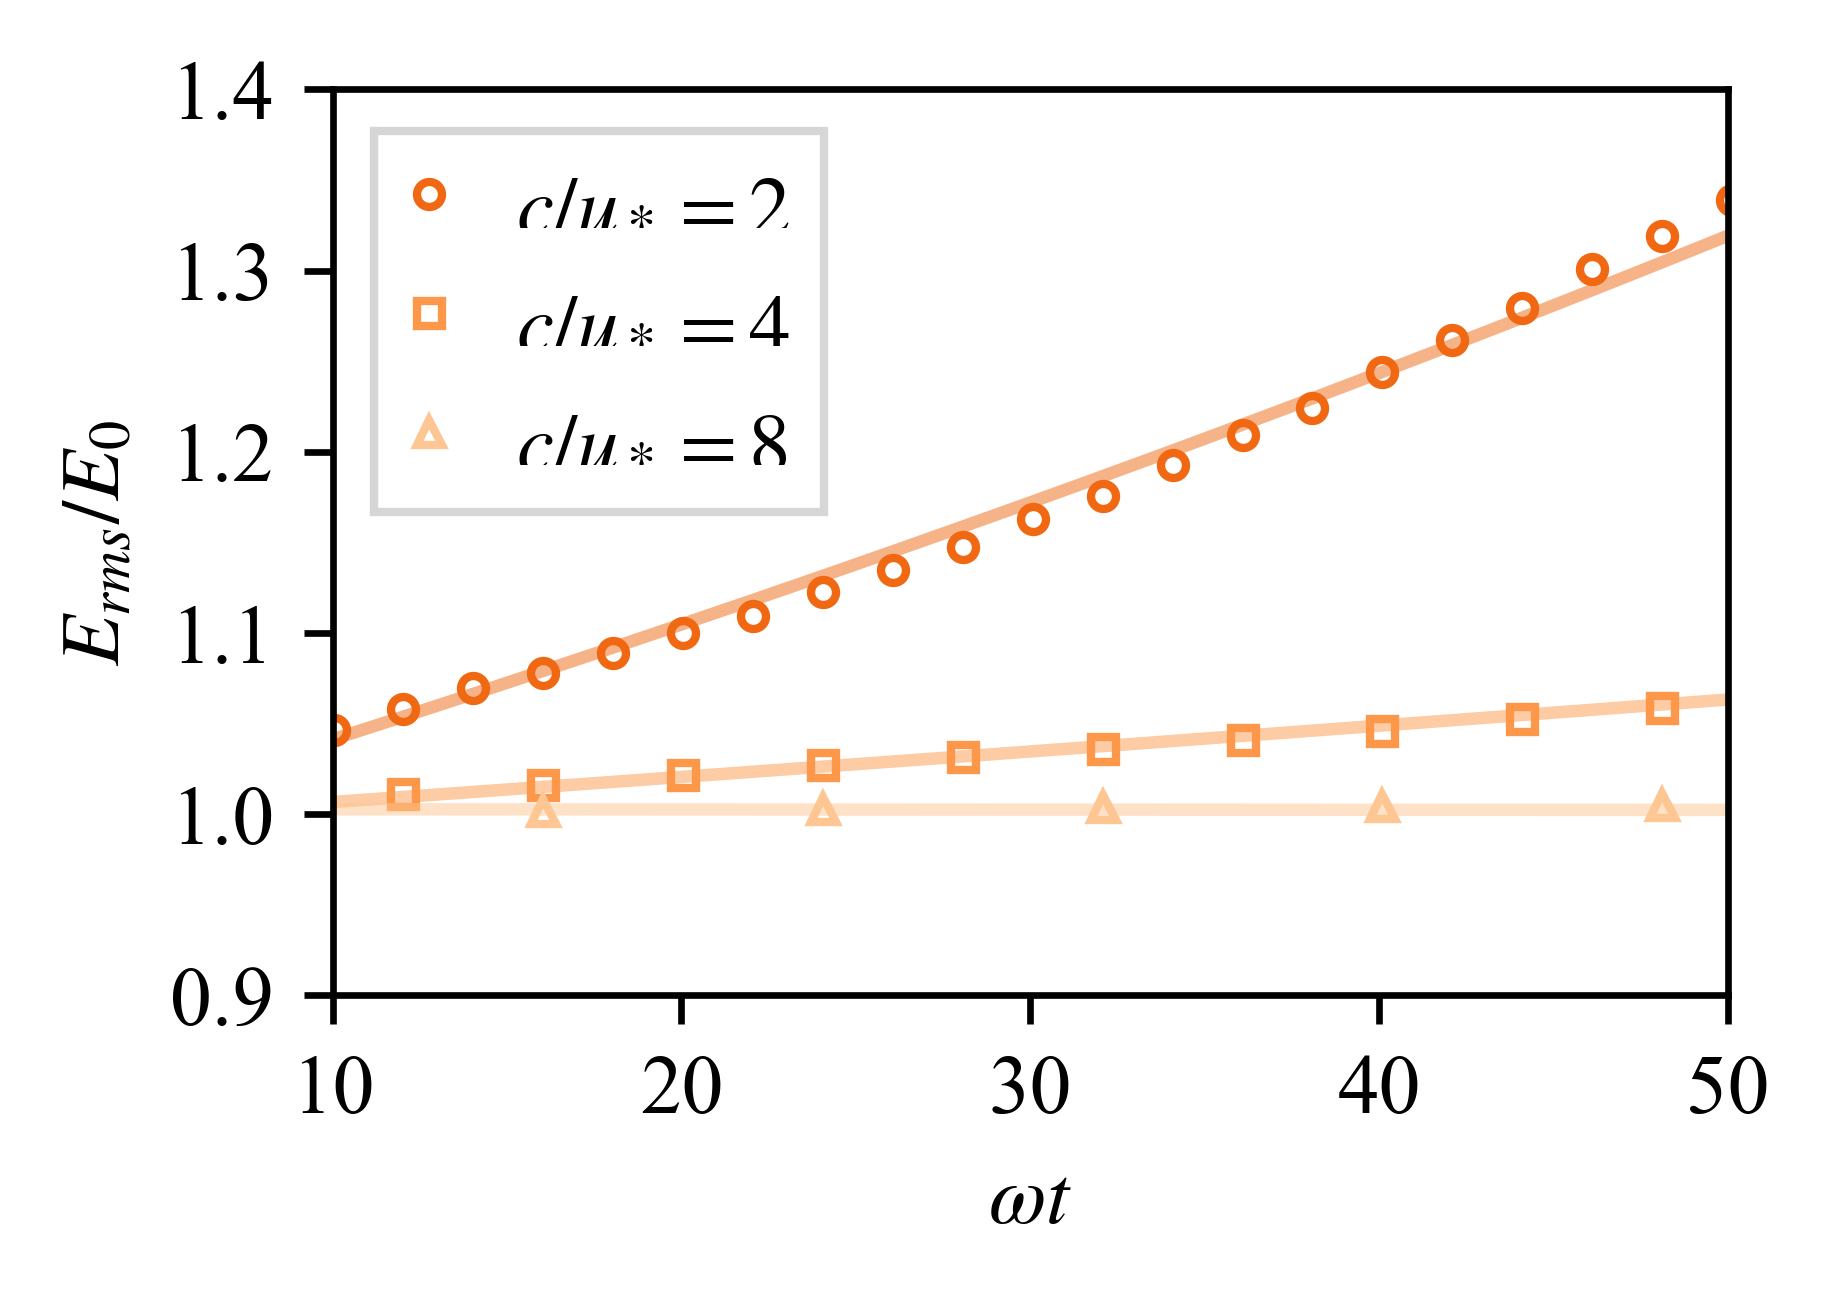

In [226]:
""" FIGURE: Wave growth plot, after all the E_rms have been computed. """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()

def plotE(case, skip=1):
    plt.plot(np.array(case.phase['t'][0:-1:skip])*case.wave.omega, case.E_rms[0:-1:skip]/case.E_rms[0], marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$' %(case.wave.c/case.ustar), lw=0, markersize=3, color=case.cc, alpha = 1) 
#     plt.plot(np.array(case.phase['t'])*case.wave.omega, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    case.wa, wb = np.polyfit(np.array(case.phase['t'])[0:25]*case.wave.omega, np.log(case.E_rms/case.E_rms[0])[0:25], 1)
    plt.plot(np.array(case.phase['t'])*case.wave.omega, np.exp(case.wa*np.array(case.phase['t'])*case.wave.omega+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

# for case in (case1,case2,case3,case7,case8,case9,case10,case11,case12,case4,case5,case6):
#     if case == case7 or case==case8 or case==case9 or case==case10 or case==case12:
#         plotE(case,skip=10)
#     else:
#         plotE(case,skip=1)
#     fit_exponential(case)

# Only plot one slope
(case1.marker, case2.marker, case3.marker) = ('o','s','^')
for case in (case1,case2,case3):
    case.E_rms= savgol_filter(case.E_rms_raw, 11, 2)    
    plotE(case)
    fit_exponential(case)

# for case in (case1,case2,case4,case5,case13,case14):
#     plotE(case)
#     fit_exponential(case)

# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$\omega t$'); plt.ylabel(r'$E_{rms}/E_0$')
plt.ylim([0.9,1.4]); plt.xlim([10,50])
plt.legend(loc='upper left', fancybox=False, handlelength=0.5)
fig.savefig('figures_jfm/wave_growth.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/wave_growth.eps', bbox_inches='tight')

In [ ]:
""" Wave growth plot alternative """

fig = plt.figure(figsize=[4,2]); ax = plt.gca()

def plotE(case, markercolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega     
    plt.plot(np.array(case.phase['t']), case.E_rms_raw-case.E_rms_raw[0], marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1) 
#     plt.plot(np.array(case.phase['t'])/T, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    T = 2*np.pi/case.wave.omega
    case.wa, wb = np.polyfit(np.array(case.phase['t'])/T, np.log(case.E_rms/case.E_rms[0]), 1)
#     plt.plot(np.array(case.phase['t'])/T, np.exp(case.wa*case.t/T+wb), color=linecolor, alpha = 0.5)
    plt.plot(np.array(case.phase['t']), np.exp(case.wa*np.array(case.phase['t'])/T+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

for case in (case1,case2,case3,case7,case8,case9,case10,case11,case4,case5,case6):
    plotE(case)
# for case in (case2,case8,case5):
#     plotE(case)
# for case in (case1,case7,case4):
#     plotE(case)


# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$t$'); plt.ylabel(r'$E-E_0$'); plt.xlim([-1,52])
plt.ylim([-0.0002,0.0015])
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

### Compare growth rate computed from two different ways

In [423]:
print(case8.field_t)
print(case8.p['t'])

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.  7.2
 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9. ]


In [43]:
""" PROCESSING: Process the bulk pressure field case.p_2D (time series) and compute the enery input. 
    Dependency: array_newcoord function. Need case.p_2D arrays.
    Add Fp to the case. """
from coordinate import array_newcoord
from scipy.signal import savgol_filter

def processing_energy1 (case):
    case.Fp = np.zeros(len(case.p['p_2D']))
    case.p_1D = np.zeros((len(case.p['p_2D']), 512))
    case.grad = np.zeros((len(case.p['p_2D']), 512))
    for i in tqdm(range(0, len(case.p['p_2D']))):
        # Find time of eta and f
        etai = np.where(np.isclose(case.phase['t'], case.p['t'][i]))[0][0]
        f_2D = case.f_2D[-1]
#         fieldi = np.where(np.isclose(case.field_t, case.p['t'][i]))[0][0]
#         f_2D = case.f_2D[fieldi] # We don't have as big a smapling frequency for f_2D
        """ Subtract the mean """
        case.p['p_2D'][i] = case.p['p_2D'][i]*(1-f_2D)**10 # Air velocity
        paverage = np.average(case.p['p_2D'][i][:,90:512])
        case.p['p_2D'][i] = (case.p['p_2D'][i] - paverage)*(1-f_2D)**10
        """ Interpolate onto new coordinate """
        eta = np.roll(np.average(case.phase['eta'][etai], axis=0), -case.phase['idx'][etai], axis=0) - 1
        p_2D_interp, zgrid = array_newcoord(case.p['p_2D'][i], case=case, eta=eta)
        """ Smooth eta and compute the gradient """
        etahat = savgol_filter(eta, 31, 4) # window size 51, polynomial order 3
        grad = np.gradient(etahat)/(2*np.pi/512)   
#         theta = np.linspace(0,8*np.pi,512)
#         grad = -np.sin(theta)*case.k*(np.var(eta)*2)**0.5
        """ Compute the energy input """
        p = p_2D_interp[:,88] - np.average(p_2D_interp[:,88])
        case.p_1D[i] = p
        case.grad[i] = grad
        case.Fp[i] = np.average(p*grad)

# for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
#     processing_energy1(case)
# for case in (case13,case14,case15,case16):
#     processing_energy1(case)
# case = case
# processing_energy1(case)
for case in (case_con1,case_con2,case_con3):
    processing_energy1(case)

100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


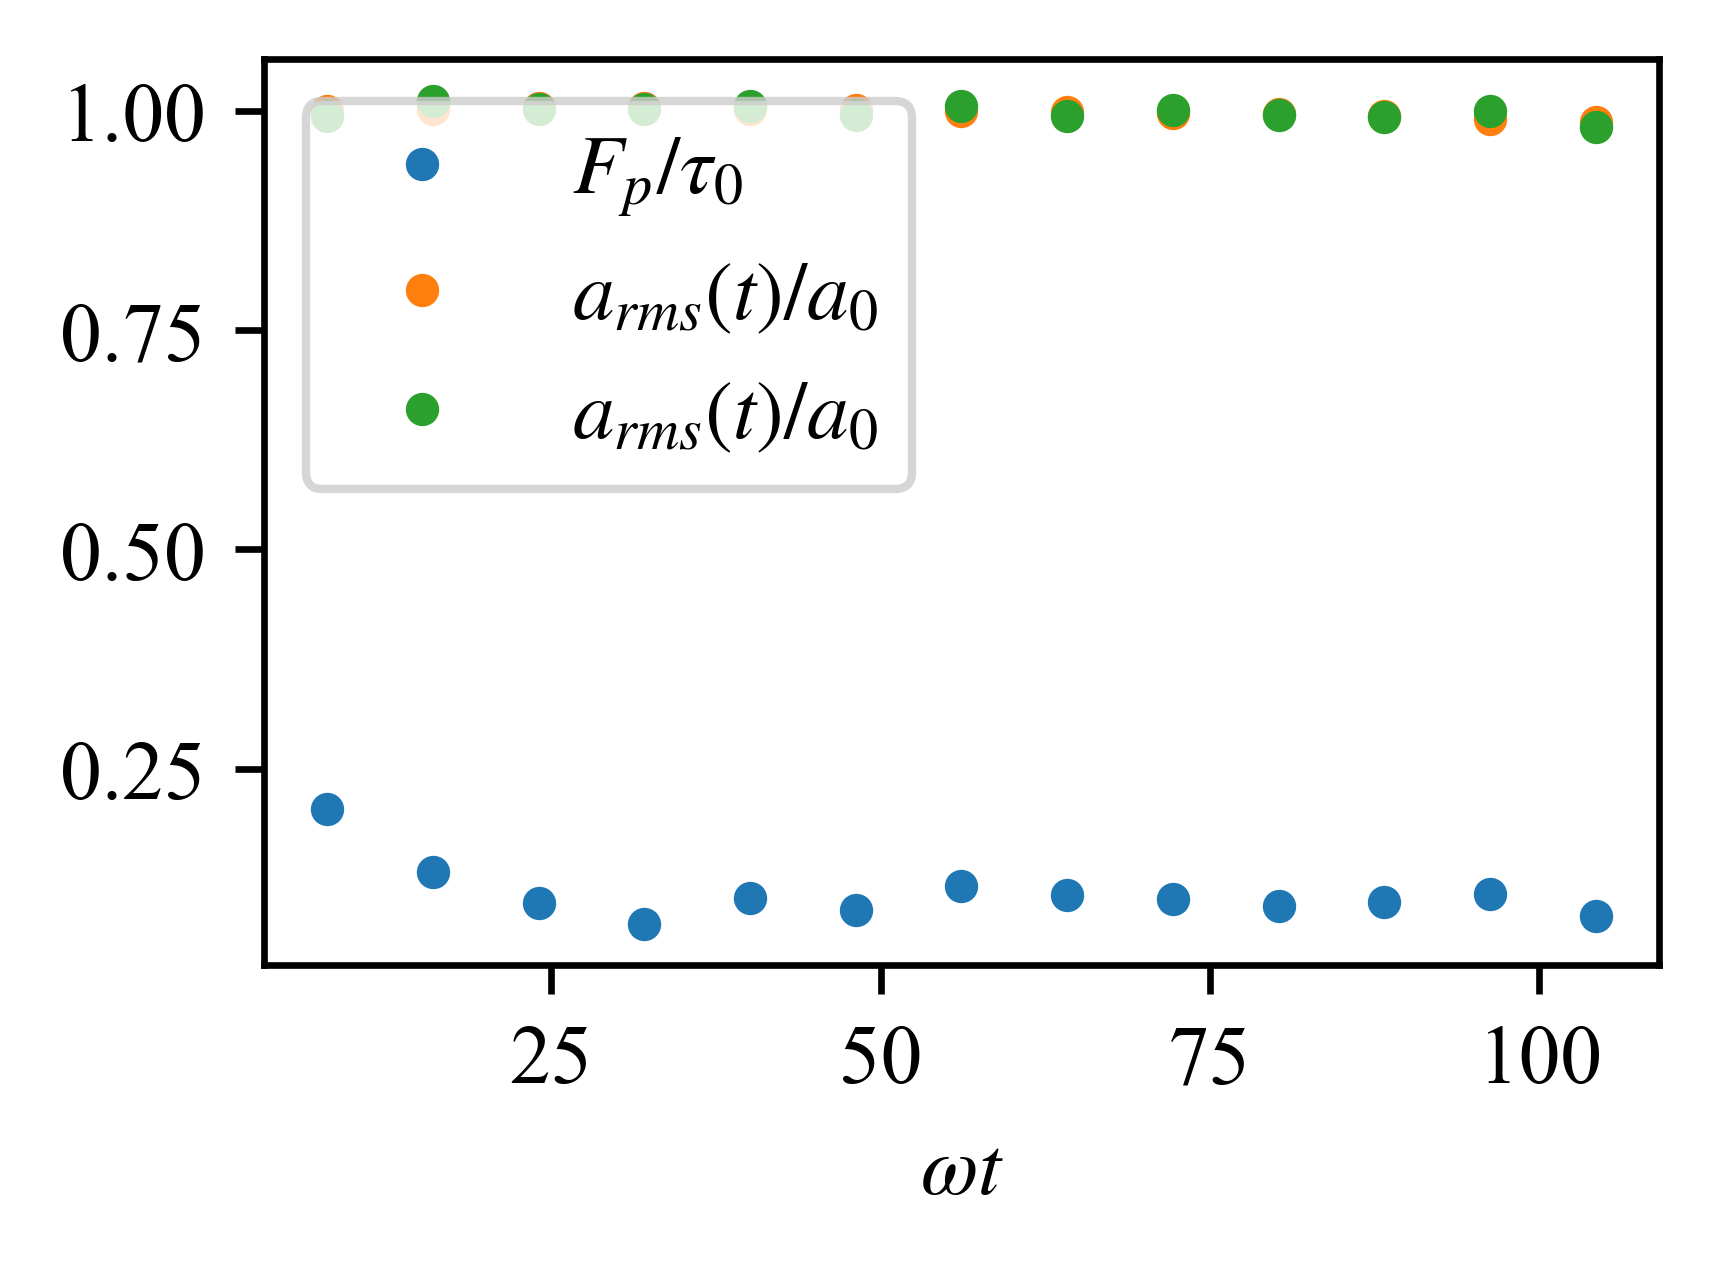

In [32]:
""" CHECK: To show the drag force changing with time. """
fig = plt.figure(figsize=[3,2])
case = case6
len(case.phase['t'])
len(case.phase['t'])
plt.plot(np.array(case.p['t'])*case.wave.omega,case.Fp/case.tau0, '.', label=r'$F_p/\tau_0}$')
# plt.plot(case.p['t'],Fp1/case.Fp[0], ls=':', c='C0'
plt.plot(np.array(case.phase['t'])*case.wave.omega,case.E_rms/case.E_rms[0], '.', label=r'$a_{rms}(t)/a_{0}$')
plt.plot(np.array(case.phase['t'])*case.wave.omega,case.E_rms_raw/case.E_rms[0], '.', label=r'$a_{rms}(t)/a_{0}$')

# plt.xlim([0,50])
# plt.ylim([0.5,2.5])
plt.xlabel(r'$\omega t$')
plt.legend(loc='upper left')

In [12]:
""" PROCESSING: compute energy growth rate. """
def processing_energy2 (case):
    case.E_rms_raw = [np.std(eta)**2 for eta in case.phase['eta']]
    case.E_rms_raw = np.array(case.E_rms_raw)*case.g*case.rho1
    case.E_rms= savgol_filter(case.E_rms_raw, 3, 2) # Filter?

# for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
#     processing_energy2(case)
# for case in (case13,case14,case15,case16):
#     processing_energy2(case)
# for case in (case17,case18):
#     processing_energy2(case)
# processing_energy2(case19)

""" For the high frequency eta ones: additional smoothing of the energy. """
for case in (case7,case8,case9,case10,case11,case14,case15,case16,case17,case18,case19):
    case.E_rms= savgol_filter(case.E_rms_raw, 31, 2)
for case in (case3,case4,case5,case6):
    case.E_rms= savgol_filter(case.E_rms_raw, 7, 2)
    
# for case in (case_con1, case_con2, case_con3):
#     processing_energy2(case)

# """ CHECK: Check the filtered energy looks ok with the choice of filter parameters. """
# fig = plt.figure(figsize=[4,2])
# plt.plot(case.E_rms-case.E_rms[0])
# plt.plot(case.E_rms_raw-case.E_rms_raw[0])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


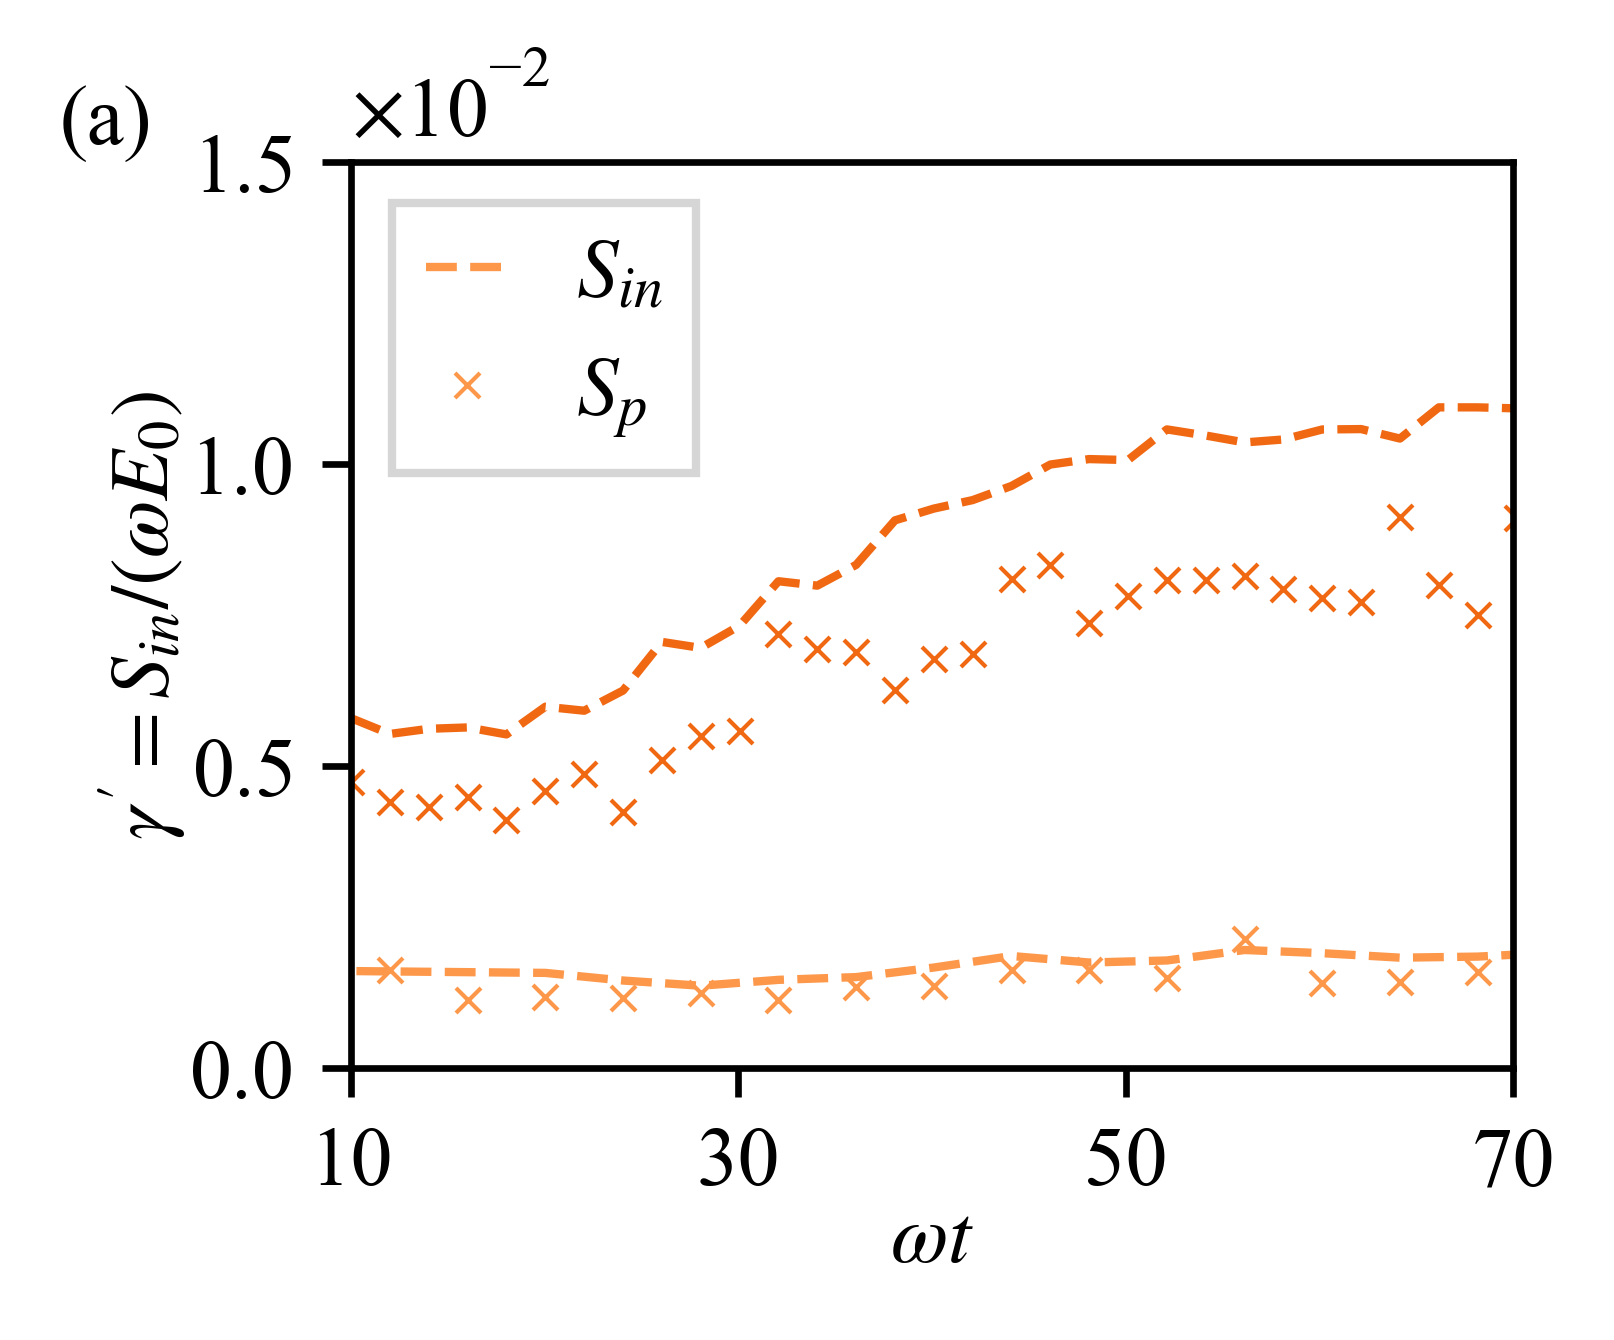

In [10]:
""" FIGURE: energy growth rate and pressure input. """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

""" Normalized with E """
# plt.plot(np.array(case.phase['t'])*case.wave.omega/2/np.pi, case.E_rate/case.E_rms/case.wave.omega, label = r'$dE_{rms}/dt$')
# plt.plot(np.array(case.phase['t'])*case.wave.omega/2/np.pi, case.Fp*case.wave.c/case.E_rms/case.wave.omega, label = r'$cF_p$')
# plt.xlabel(r'$t/T$')
# plt.ylabel(r'$\frac{1}{\omega E}\frac{dE}{dt}$')

""" Normalized with E0 """
# case.E_rate_smooth = savgol_filter(case.E_rate, 21, 6) # Filter
# plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate_smooth/case.E_rms[0]/case.wave.omega, label = r'$dE_{rms}/dt$', marker='^', mfc='none',
#          markersize=3, alpha = 1) # Plot marker and line
# case.Fp_smooth = savgol_filter(case.Fp, 21, 6) # Filter
# plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp_smooth*case.wave.c/case.E_rms[0]/case.wave.omega, label = r'$cF_p$', marker='>', mfc='none',
#          markersize=3, alpha=1) # Plot marker and line
# plt.legend(loc = 'upper left')

""" Version 2 """
case = case1
case.E_rate = np.zeros(len(case.E_rms))
# Fit expoenential
# fit_exponential(case)
# E_exp = np.exp(case.wa*np.array(case.phase['t'])*case.wave.omega)*case.E_rms[0]
# case.E_rate = np.gradient(E_exp)/((case.phase['t'][1]-case.phase['t'][0])*case.wave.omega)
# Moving window 
ws = 4 #half window size
ntime = np.size(case.phase['t'])
for i in range(ws,ntime-ws):
    case.E_rate[i] = (case.E_rms[i+ws] - case.E_rms[i-ws])/(case.phase['t'][i+ws]-case.phase['t'][i-ws])
for i in range(0, ws):
    case.E_rate[i] = np.nan
for i in range(ntime-ws,ntime):
    case.E_rate[i] = np.nan

p1, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate/case.E_rms[0]/case.wave.omega + 2.44*10**-4, c=case.cc, ls='--', lw=1, markersize=3) # First plot markers opaque
case.E_rate_smooth = savgol_filter(case.E_rate, 21, 6) # Then filter
# p2, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate_smooth/case.E_rms/case.wave.omega, label = r'$dE_{rms}/dt$', c='C0') # Then plot solid line
p3, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp*case.wave.c/case.E_rms[0]/case.wave.omega, c=case.cc, marker='x', mfc='none',
               markeredgewidth=0.5, lw=0, markersize=3) # Plot markers 
# case.Fp_smooth = savgol_filter(case.Fp, 21, 7) # Filter
# p4, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp_smooth*case.wave.c/case.E_rms/case.wave.omega, label = r'$cF_p$', c='C1') # Plot line
l = ax.legend([(p1), (p3)], [r'$S_{in}$', r'$S_p$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', fancybox=False, handlelength=1)

case = case2
case.E_rms= savgol_filter(case.E_rms_raw, 11, 2)
case.E_rate = np.zeros(len(case.E_rms))
ws = 1 #half window size
ntime = np.size(case.phase['t'])
for i in range(ws,ntime-ws):
    case.E_rate[i] = (case.E_rms[i+ws] - case.E_rms[i-ws])/(case.phase['t'][i+ws]-case.phase['t'][i-ws])
for i in range(0, ws):
    case.E_rate[i] = np.nan
for i in range(ntime-ws,ntime):
    case.E_rate[i] = np.nan
    
# p1, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate/case.E_rms[0]/case.wave.omega + 2.44*10**-4, c=case.cc, marker='>', mfc='none',
#                markeredgewidth=0.5, lw=0, markersize=3) # First plot markers opaque
p1, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate/case.E_rms[0]/case.wave.omega + 2.44*10**-4, c=case.cc, ls='--', lw=1, markersize=3) # First plot markers opaque
case.E_rate_smooth = savgol_filter(case.E_rate, 21, 6) # Then filter
# p2, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate_smooth/case.E_rms/case.wave.omega, label = r'$dE_{rms}/dt$', c='C0') # Then plot solid line
p3, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp*case.wave.c/case.E_rms[0]/case.wave.omega, c=case.cc, marker='x', mfc='none',
               markeredgewidth=0.5, lw=0, markersize=3) # Plot markers 
# case.Fp_smooth = savgol_filter(case.Fp, 21, 7) # Filter
# p4, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp_smooth*case.wave.c/case.E_rms/case.wave.omega, label = r'$cF_p$', c='C1') # Plot line
l = ax.legend([(p1), (p3)], [r'$S_{in}$', r'$S_p$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', fancybox=False, handlelength=1)

plt.xlabel(r'$\omega t$', labelpad=0)
plt.ylabel(r'$\gamma^{\prime} = S_{in}/(\omega E_0)$', labelpad=0)
# plt.ylim([-0.000,0.015])
plt.xlim([10, 70])

# plt.title(r'$ak=%g, c/u_*=%.0f$' %(case.ak, case.wave.c/case.ustar))
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.yticks(np.arange(0, 0.02, 0.005))
plt.xticks(np.arange(10, 80, 20))
ax.yaxis.set_major_formatter(formatter) 
ax.annotate('(a)', xy=(-0.25, 1), ha='left', va='bottom', xycoords='axes fraction')

plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

fig.savefig('figures_jfm/cFp_vs_dEdt_ak02_c2c4.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/cFp_vs_dEdt_ak02_c2c4.eps', bbox_inches='tight')
# fig.savefig('figures/cFp_vs_dEdt_ak02_c2_version1.pdf', bbox_inches='tight', pad_inches=0.1)

### Finding $\phi_p$ and $\hat{p}$ and compare the drag computed to the full expression

Text(0, 0.5, '$F_p/\\tau_0$')

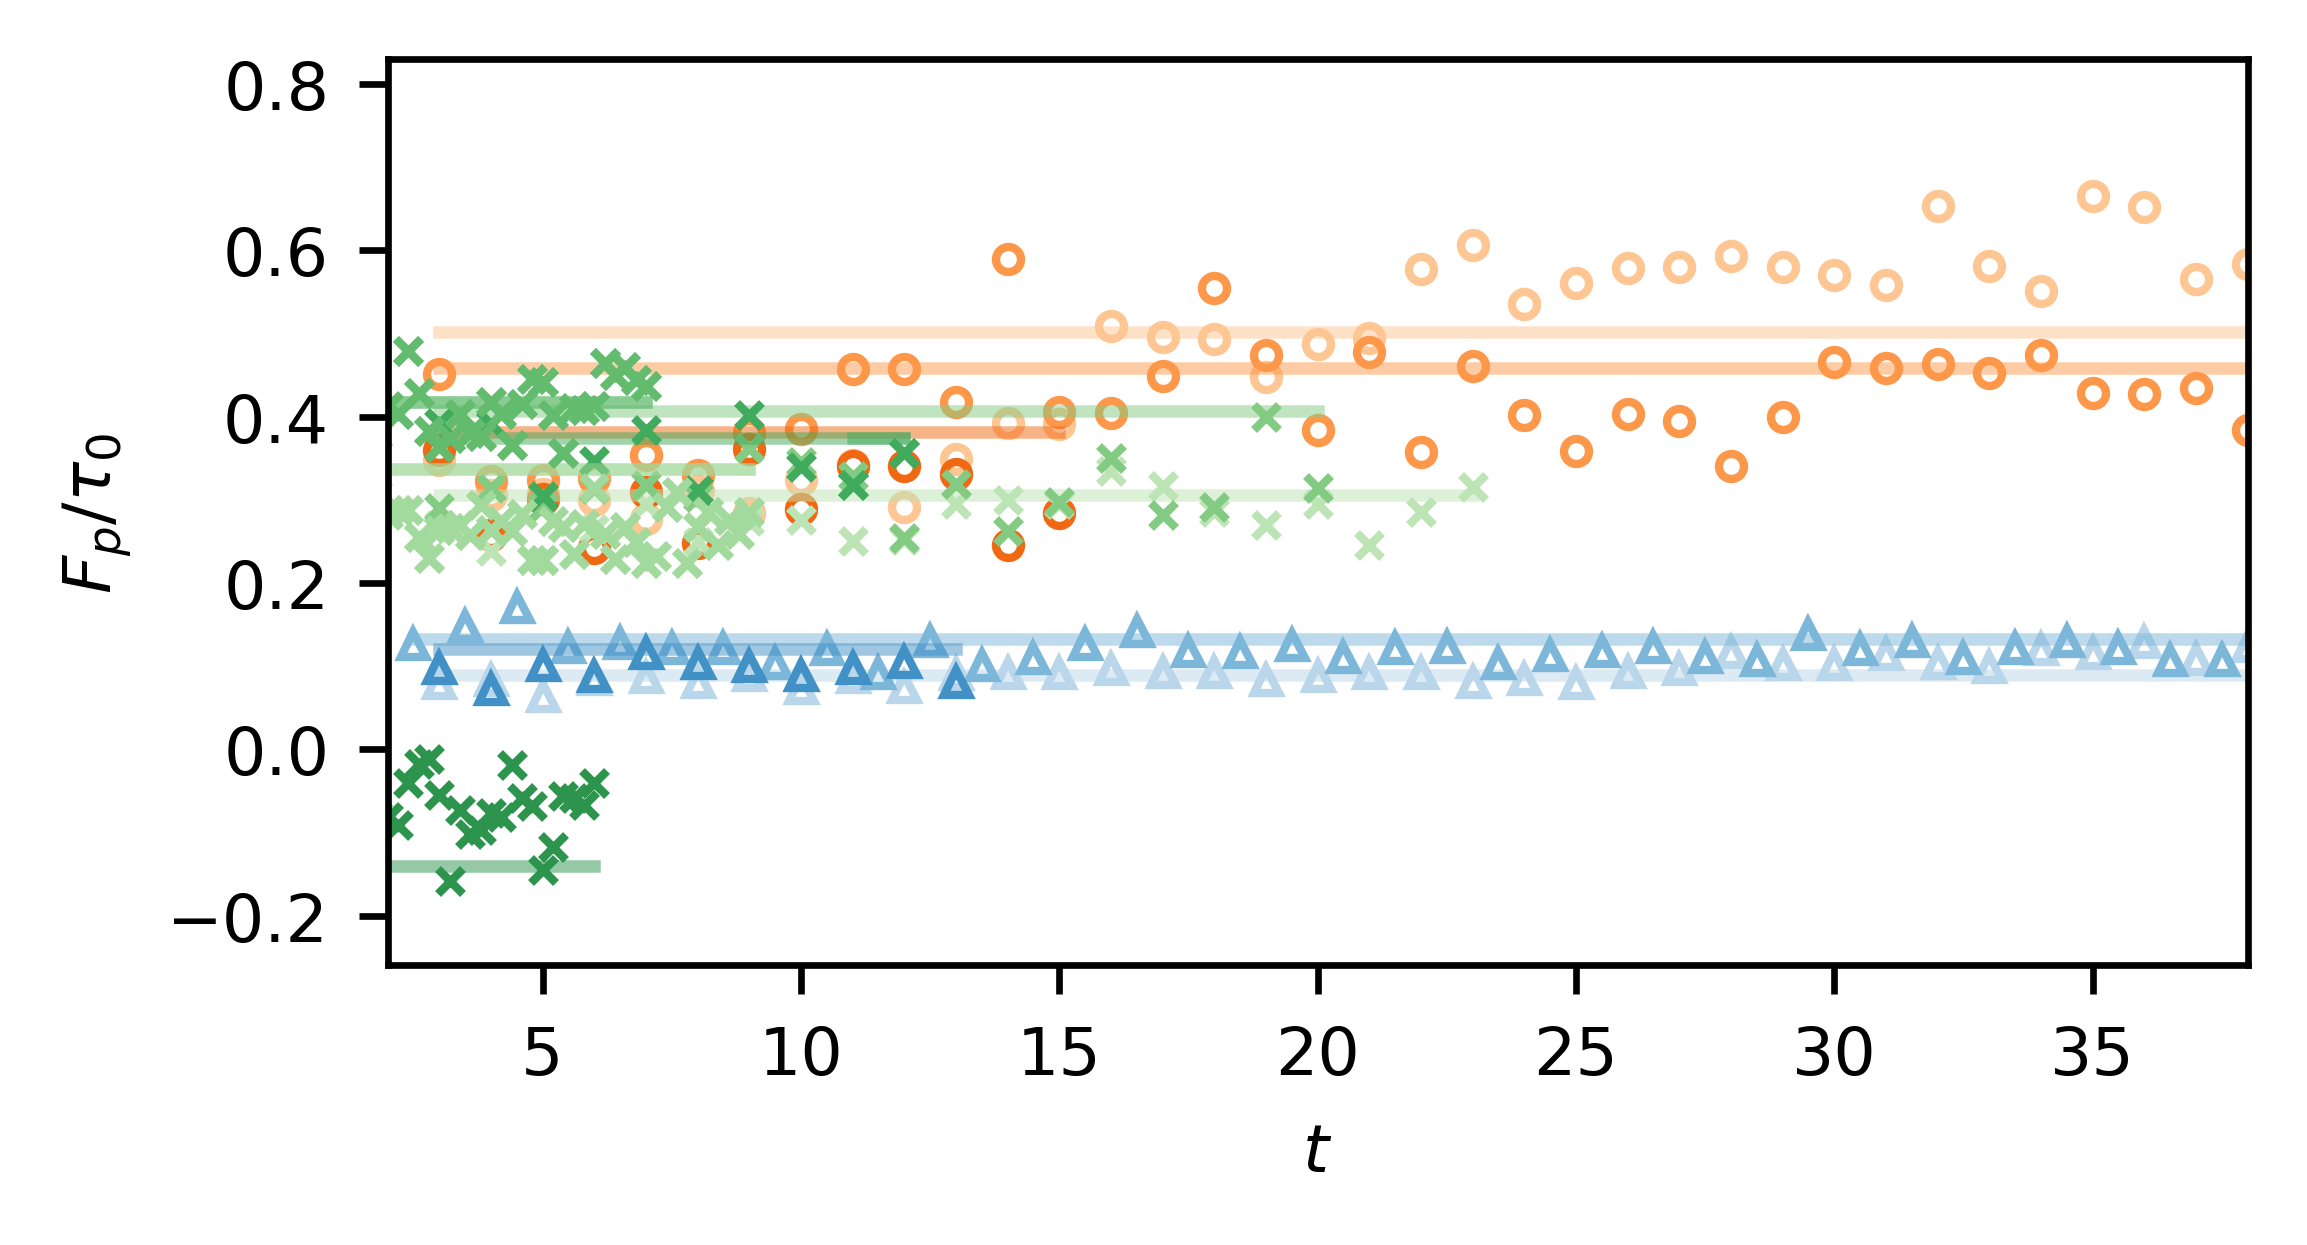

In [116]:
""" CHECK: one single psin vs Fp time sequence. """
plt.figure(figsize=[4,2])
for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
    case.tau0 = case.rho2*case.ustar**2
    plt.plot(case.p['t'][2:], case.Fp[2:]/case.tau0, marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1)
    case.Fp_aver = np.average(case.Fp[2:])
    """ Assuming sinusoidal """
    case.psin = 0.5*np.average(case.pamp)*np.sin(np.average(case.dphase)/128*2*np.pi)*case.ak
    plt.plot(case.p['t'][2:], case.psin/case.tau0*np.ones(len(case.p['t'][2:])), color=case.cc, alpha = 0.5)
for case in (case8,case10,case11):
    case.tau0 = case.rho2*case.ustar**2
    plt.plot(case.p['t'][10:], case.Fp[10:]/case.tau0, marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1)
    case.Fp_aver = np.average(case.Fp[10:])
    """ Assuming sinusoidal """
    case.psin = 0.5*np.average(case.pamp)*np.sin(np.average(case.dphase)/128*2*np.pi)*case.ak
    plt.plot(case.p['t'][10:], case.psin/case.tau0*np.ones(len(case.p['t'][10:])), color=case.cc, alpha = 0.5)
plt.xlabel(r'$t$')
plt.xlim([2,38])
plt.ylabel(r'$F_p/\tau_0$')

0.006761239472308896
0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


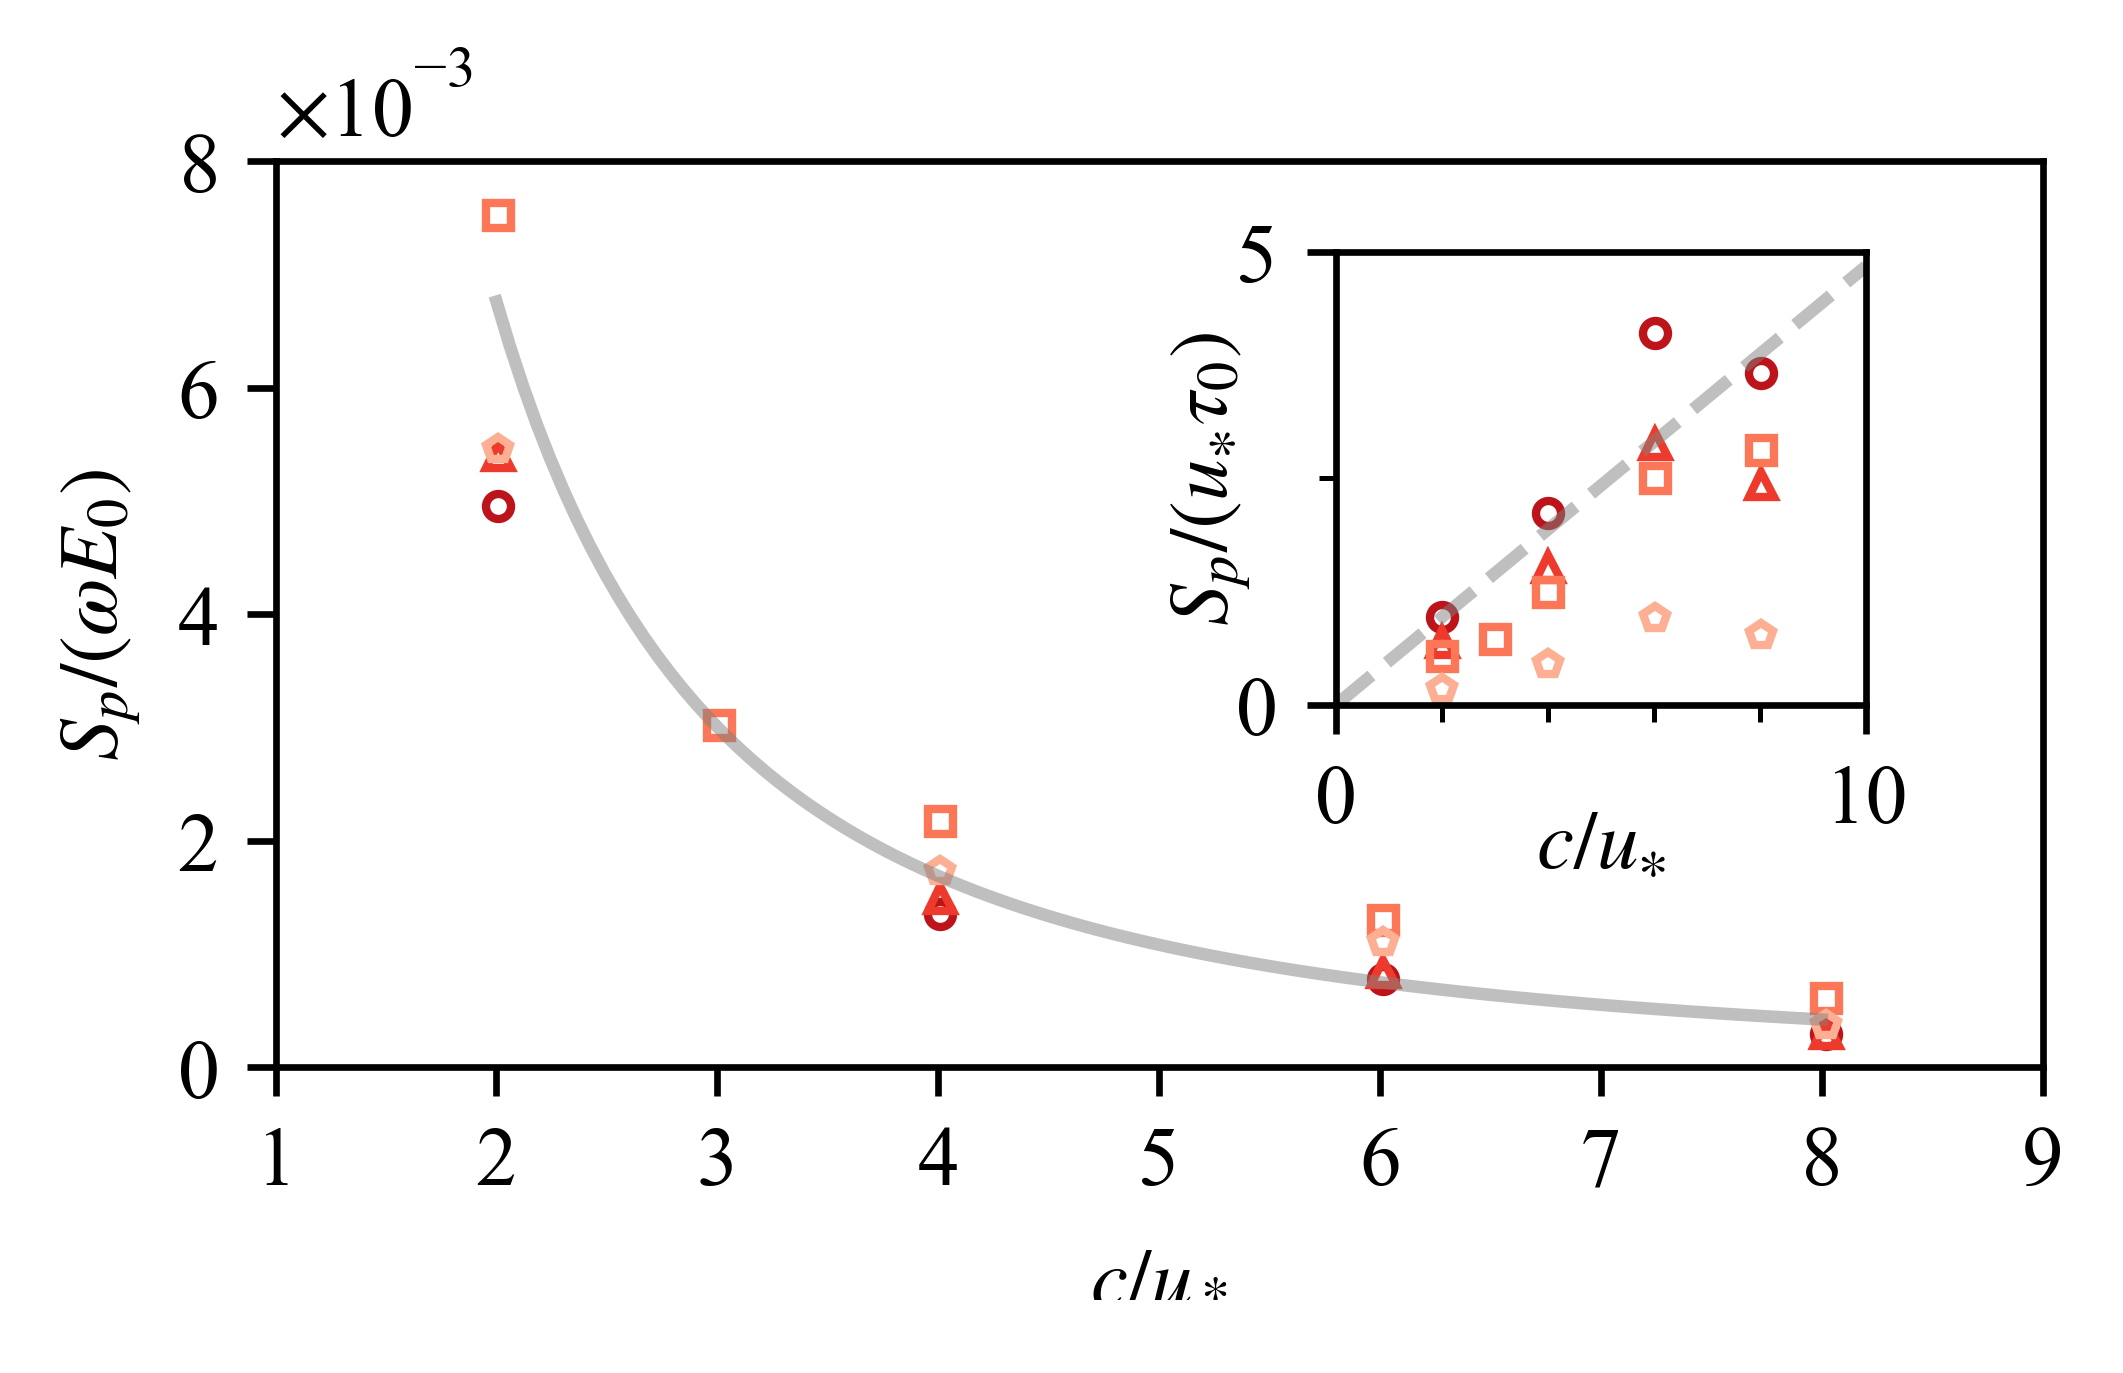

In [17]:
""" FIGURE: Fp*c and dE/dt """
fig = plt.figure(figsize=[3.8,2]); ax1 = plt.gca()
# Manually set the position and relative size of the inset axes within ax1
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.6,0.4,0.3,0.5])
ax2.set_axes_locator(ip)

# for case in (case14,case15,case16,case18):
#     p0, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='o', mfc='none', 
#                   lw=0, markersize=3, color=cmap(39), alpha = 1)
# for case in (case1,case2,case3):
#     p1, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='^', mfc='none', 
#                    lw=0, markersize=3, color=cmap(37), alpha = 1)
# for case in (case7,case9,case8,case10,case11):
#     p3, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='s', mfc='none',
#                    lw=0, markersize=3, color=cmap(35), alpha = 1)
# for case in (case4,case5,case6,case17):
#     p5, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='p', mfc='none',
#                    lw=0, markersize=3, color=cmap(33), alpha = 1)

""" Normalized in a commonly seen way """
for case in (case14,case15,case18,case16):
    p7, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case1,case2,case19,case3):
    p1, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='^', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(35), alpha = 1)
for case in (case4,case5,case17,case6):
    p5, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='p', mfc='none',
                   lw=0, markersize=3, color=cmap(33), alpha = 1)

    
# l = ax1.legend([(p7),(p1),(p3),(p5)], [r'$ak=0.25$', r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.15, 0.75), fancybox=False, handlelength=0.5)

x1 = np.linspace(2,8,100)
case = case1
y1 = 5*(1/x1)**2*case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega
print(y1[0])
ax1.plot(x1, y1, c='gray',alpha=0.5)

""" Inset: Normalized in another way """
for case in (case14,case15,case18,case16):
    p7, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.tau0*case.ustar), marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case1,case2,case19,case3):
    p1, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.tau0*case.ustar), marker='^', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.tau0*case.ustar), marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(35), alpha = 1)
for case in (case4,case5,case17,case6):
    p5, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.tau0*case.ustar), marker='p', mfc='none',
                   lw=0, markersize=3, color=cmap(33), alpha = 1)
    
x1 = np.linspace(0,10,100)
case = case1
y1 = x1*case.Fp_aver*case.wave.c/(case.tau0*case.ustar)*0.7
print(y1[0])
ax2.plot(x1, y1, c='gray', linestyle='--', alpha=0.5)

ax1.set_xlim([1,9])
ax1.set_ylim([0,0.8*10**(-2)])
ax2.set_xlim([0,10])
ax2.set_ylim([0,5])
ax1.set_xlabel(r'$c/u_*$')
ax1.set_ylabel(r'$S_{p}/(\omega E_0)$')
ax2.set_xlabel(r'$c/u_{\ast}$', labelpad=-4)
ax2.set_ylabel(r'$S_p/(u_{\ast}\tau_0)$', labelpad=-2)
ax1.set_xticks(np.arange(1,10,1))
ax1.set_yticks(np.arange(0,1,0.2)*10**(-2))
ax2.set_yticks(((0,5)))
ax2.set_xticks(((0,10)))
formatter1 = ticker.ScalarFormatter(useMathText=True)
formatter1.set_scientific(True) 
formatter1.set_powerlimits((-1,1)) 
# formatter2 = ticker.ScalarFormatter(useMathText=True)
# formatter2.set_scientific(True) 
# formatter2.set_powerlimits((-1,1))
# ax2.yaxis.set_major_formatter(formatter2) 
ax1.yaxis.set_major_formatter(formatter1) 
ax2.xaxis.set_minor_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(2.5))
fig.savefig('figures_jfm/energy_rate.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/energy_rate.eps', bbox_inches='tight')

11 31
13 133
19 99
11 103
5 20
5 20
11 109
5 14
59 159
11 89
59 339
11 149
29 119


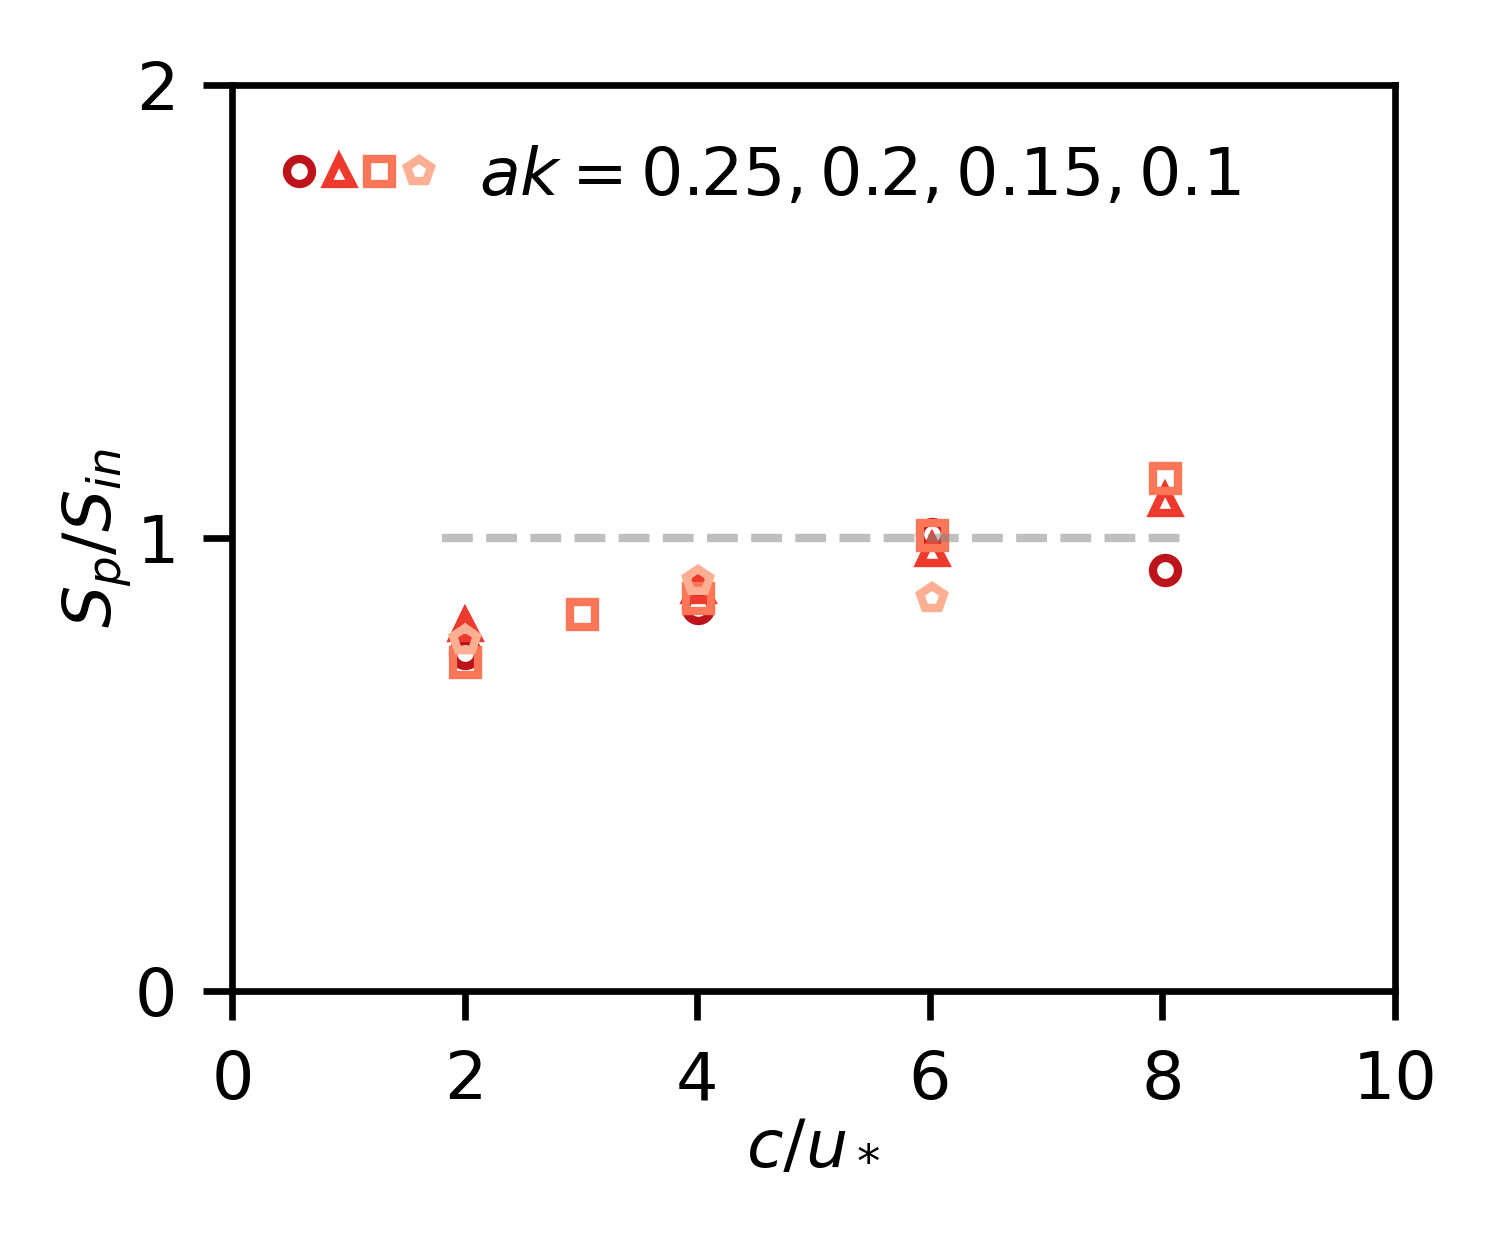

In [13]:
""" FIGURE: Fp*c / dE/dt ratio """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

""" Run after the Fp figure is run and the time range of Fp is settled. 
    Has to be of the same time period with Fp_aver!!!
"""
   
for case in (case14,case15,case18,case16):
    etai1 = np.where(np.isclose(case.phase['t'], case.tp1))[0][0]
    etai2 = np.where(np.isclose(case.phase['t'], case.tp2))[0][0]
    print(etai1,etai2)
    case.Erate_aver = (case.E_rms[etai1]-case.E_rms[etai2])/(case.phase['t'][etai1]-case.phase['t'][etai2])
    p0, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), 
                   marker='o', mfc='none', lw=0, markersize=3, color=cmap(39), alpha = 1, markeredgewidth=1)

for case in (case1,case2,case19,case3):
    etai1 = np.where(np.isclose(case.phase['t'], case.tp1))[0][0]
    etai2 = np.where(np.isclose(case.phase['t'], case.tp2))[0][0]
    print(etai1,etai2)
    case.Erate_aver = (case.E_rms[etai1]-case.E_rms[etai2])/(case.phase['t'][etai1]-case.phase['t'][etai2])
#     print(case.Erate_aver/case.E_rms[0])
#     print(4*case.mu1/case.rho1*case.k**2)
#     print(4*6.1*10**(-5)*case.wave.omega)
    p2, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), 
                   marker='^', mfc='none', lw=0, markersize=3, color=cmap(37), alpha = 1, markeredgewidth=1)
    
for case in (case7,case8,case9,case10,case11):
    etai1 = np.where(np.isclose(case.phase['t'], case.tp1))[0][0]
    etai2 = np.where(np.isclose(case.phase['t'], case.tp2))[0][0]
    print(etai1,etai2)
    case.Erate_aver = (case.E_rms[etai1]-case.E_rms[etai2])/(case.phase['t'][etai1]-case.phase['t'][etai2])
    p4, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), 
                   marker='s', mfc='none', lw=0, markersize=3, color=cmap(35), alpha = 1, markeredgewidth=1)

for case in (case4,case5,case17,case6):
    etai1 = np.where(np.isclose(case.phase['t'], case.tp1))[0][0]
    etai2 = np.where(np.isclose(case.phase['t'], case.tp2))[0][0]
    case.Erate_aver = (case.E_rms[etai1]-case.E_rms[etai2])/(case.phase['t'][etai1]-case.phase['t'][etai2])
    p6, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), 
                   marker='p', mfc='none', lw=0, markersize=3, color=cmap(33), alpha = 1, markeredgewidth=1)
    
l = ax.legend([(p0,p2,p4,p6)], [r'$ak=0.25, 0.2, 0.15, 0.1$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', frameon=False, fancybox=False, handlelength=2, ncol=1)

plt.plot(np.linspace(1.8,8.2,20), np.ones(20), '--', c='gray', alpha=0.5, linewidth=1)
plt.xlabel(r'$c/u_*$', labelpad=0)
plt.ylim([0, 2])
plt.xlim([0, 10])
plt.yticks(np.arange(0,3,1))
plt.xticks(np.arange(0,12,2))
plt.ylabel(r'$S_p/S_{in}$', labelpad=0)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
# ax.annotate('(b)', xy=(-0.2, 1), ha='left', va='bottom', xycoords='axes fraction')
# fig.savefig('figures_jfm/cFp_over_dEdt.eps', bbox_inches='tight')
# fig.savefig('figures_jfm/cFp_over_dEdt.pdf', bbox_inches='tight')

### Some visulization of the pressure patterns
This is done on one case with averaged pressure. Pick one case.

In [130]:
""" Interpolate the pressure (averaged already). """
case = case3
from coordinate import array_newcoord
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)

In [ ]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from IPython.display import HTML

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate    
    fig = plt.figure(figsize = [4,2]); ax = plt.gca()
    ax.set_ylabel(r'$p/\rho_a u_*^2$')
    ax.set_xlabel(r'$x/\lambda$')

    # animation function.  This is called sequentially
    def animate(i):
        ax.clear()
        imgplot = animate_function(i, ax)
        ax.text(0.1, 0.95, r'$t = %g$' %i, ha='center', va='center', fontsize=6,
        color='gray', transform=ax.transAxes)
        ax.set_title('$c/u_* = %.0f, ak = %g$' %(case.wave.c/case.ustar, case.ak))
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim

# Define the function called at every animation time to read in images
def plot_func(i, ax):
    p2D_interp, zgrid = array_newcoord(case.p_2D[i], case=case, eta=eta)
    """ FIGURE: Show the 1D distribution of pressure at different height. """
    plt.figure(figsize = [4,2])
    for i in range (0,4):
        p1D_smooth = savgol_filter(p2D_interp[:,85+i*5], 21, 4)
        ax.plot(xarray/(2*np.pi/case.k), p1D_smooth/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/4))
        ax.plot(np.ones(20)*(i-1.25), np.linspace(-10,10,20),'--', c='gray', lw=1)
        ax.text(0.25, 0.95, r'$\Delta \phi = 90 \degree $', ha='center', va='center', fontsize=6,
                color='gray', transform=ax.transAxes)
    ax.set_ylim([-10,10]); ax.set_xlim([-2,2])
    img, = ax.plot(xarray/(2*np.pi/case.k), (eta)*case.k*2, c='gray', alpha=0.5)
    return img

anim = plot_animation(plot_func, frame_number = len(case.p['t']), interval_time = 200) # Specify frame number
HTML(anim.to_html5_video())

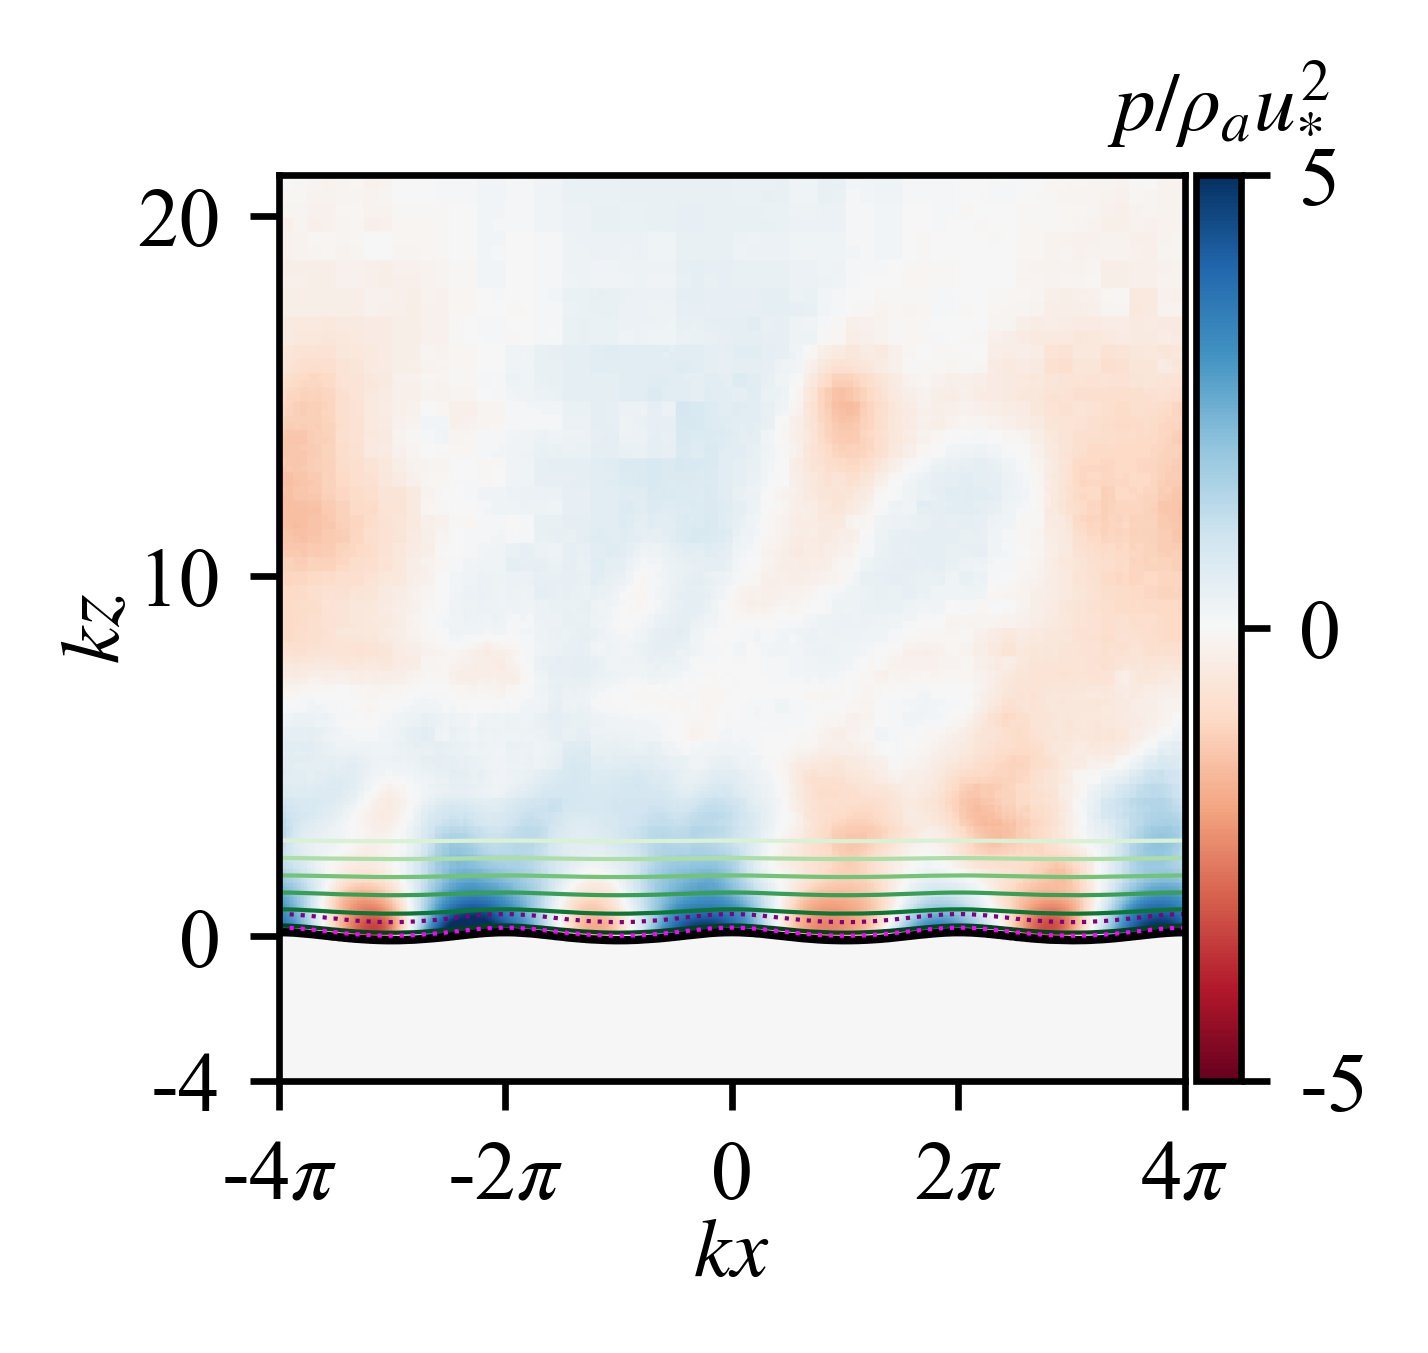

In [472]:
""" FIGURE(1/2): Plot of the pressure in the original coordinate. """
fig = plt.figure(figsize=[2.35,2]); ax = plt.gca()
case.tau0 = case.ustar**2*case.rho2

case = case5

""" Instantanous """
tindex = 10
img = plt.imshow(np.rot90(case.p['p_2D'][tindex]/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
p2D_interp, zgrid = array_newcoord(case.p['p_2D'][tindex], case=case, eta=eta)
""" Averaged """
# img = plt.imshow(np.rot90(p2D_aver)/case.tau0, cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
xarray = np.linspace(-np.pi, np.pi, 512)*4
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
plt.plot(xarray, eta*4, 'k', lw=1)
for i in range (0,6):
    plt.plot(xarray, (zgrid[:,85+i*10])*4, c=plt.cm.get_cmap('Greens')(1-i/6), lw=0.5)

plt.plot(xarray, (0.08*2*np.pi/4+eta)*4, ':', c='purple', lw=0.5)
plt.plot(xarray, (0.02*2*np.pi/4+eta)*4, ':', c='magenta', lw=0.5)

# img = plt.imshow(np.rot90(p2D_aver_interp/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
# cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
# xarray = np.linspace(-np.pi, np.pi, 512)*4
# plt.plot(xarray, np.ones(512)*0, c='k', lw=1)
# for i in range (0,8):
#     plt.plot(xarray, np.ones(512)*((85+i*5)/512)*8*np.pi-4, '--', c=plt.cm.get_cmap('Greens')(1-i/8), lw=0.5)

plt.xlabel(r'$kx$', labelpad=0)
plt.ylabel(r'$kz$', labelpad=0)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-4, 0, 10, 20))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-4,8*np.pi-4])
cbar.set_ticks([-5,0,5])
cbar.set_ticklabels([-5,0,5])
cbar.ax.text(0.5, 1.08, r'$p/\rho_a u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
fig.savefig('figures_jfm/pressure_colormap1_instantanous_cu4_ak01.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/pressure_colormap1_instantanous_cu4_ak01.eps', bbox_inches='tight', pad_inches=0)

In [479]:
(85-1/2/np.pi*512)/512*2*np.pi*4

0.1724277430489439

In [ ]:
""" FIGURE(2/2): Plot of the pressure in the transformed coordinate. """
fig = plt.figure(figsize=[3,2]); ax=plt.gca()

""" Instantanous """
img = plt.imshow(np.rot90(p2D_interp/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
""" Averaged """
# img = plt.imshow(np.rot90(p2D_aver_interp/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
xarray = np.linspace(-np.pi, np.pi, 512)*4
plt.plot(xarray, np.ones(512)*0, c='k', lw=1)
for i in range (0,6):
    plt.plot(xarray, np.ones(512)*((85+i*5)/512)*8*np.pi-4, c=plt.cm.get_cmap('Greens')(1-i/6), lw=0.5)
    
# plt.axis('off')
plt.xlabel(r'$k\xi$', labelpad=0)
plt.ylabel(r'$k\zeta$', labelpad=0)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-4, 0, 10, 20))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-4,8*np.pi-4])
cbar.set_ticks([-5,0,5])
cbar.set_ticklabels([-5,0,5])
cbar.ax.text(0.5, 1.08, r'$p/\rho_a u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
# fig.savefig('figures_jfm/pressure_colormap2.pdf', bbox_inches='tight', pad_inches=0.1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


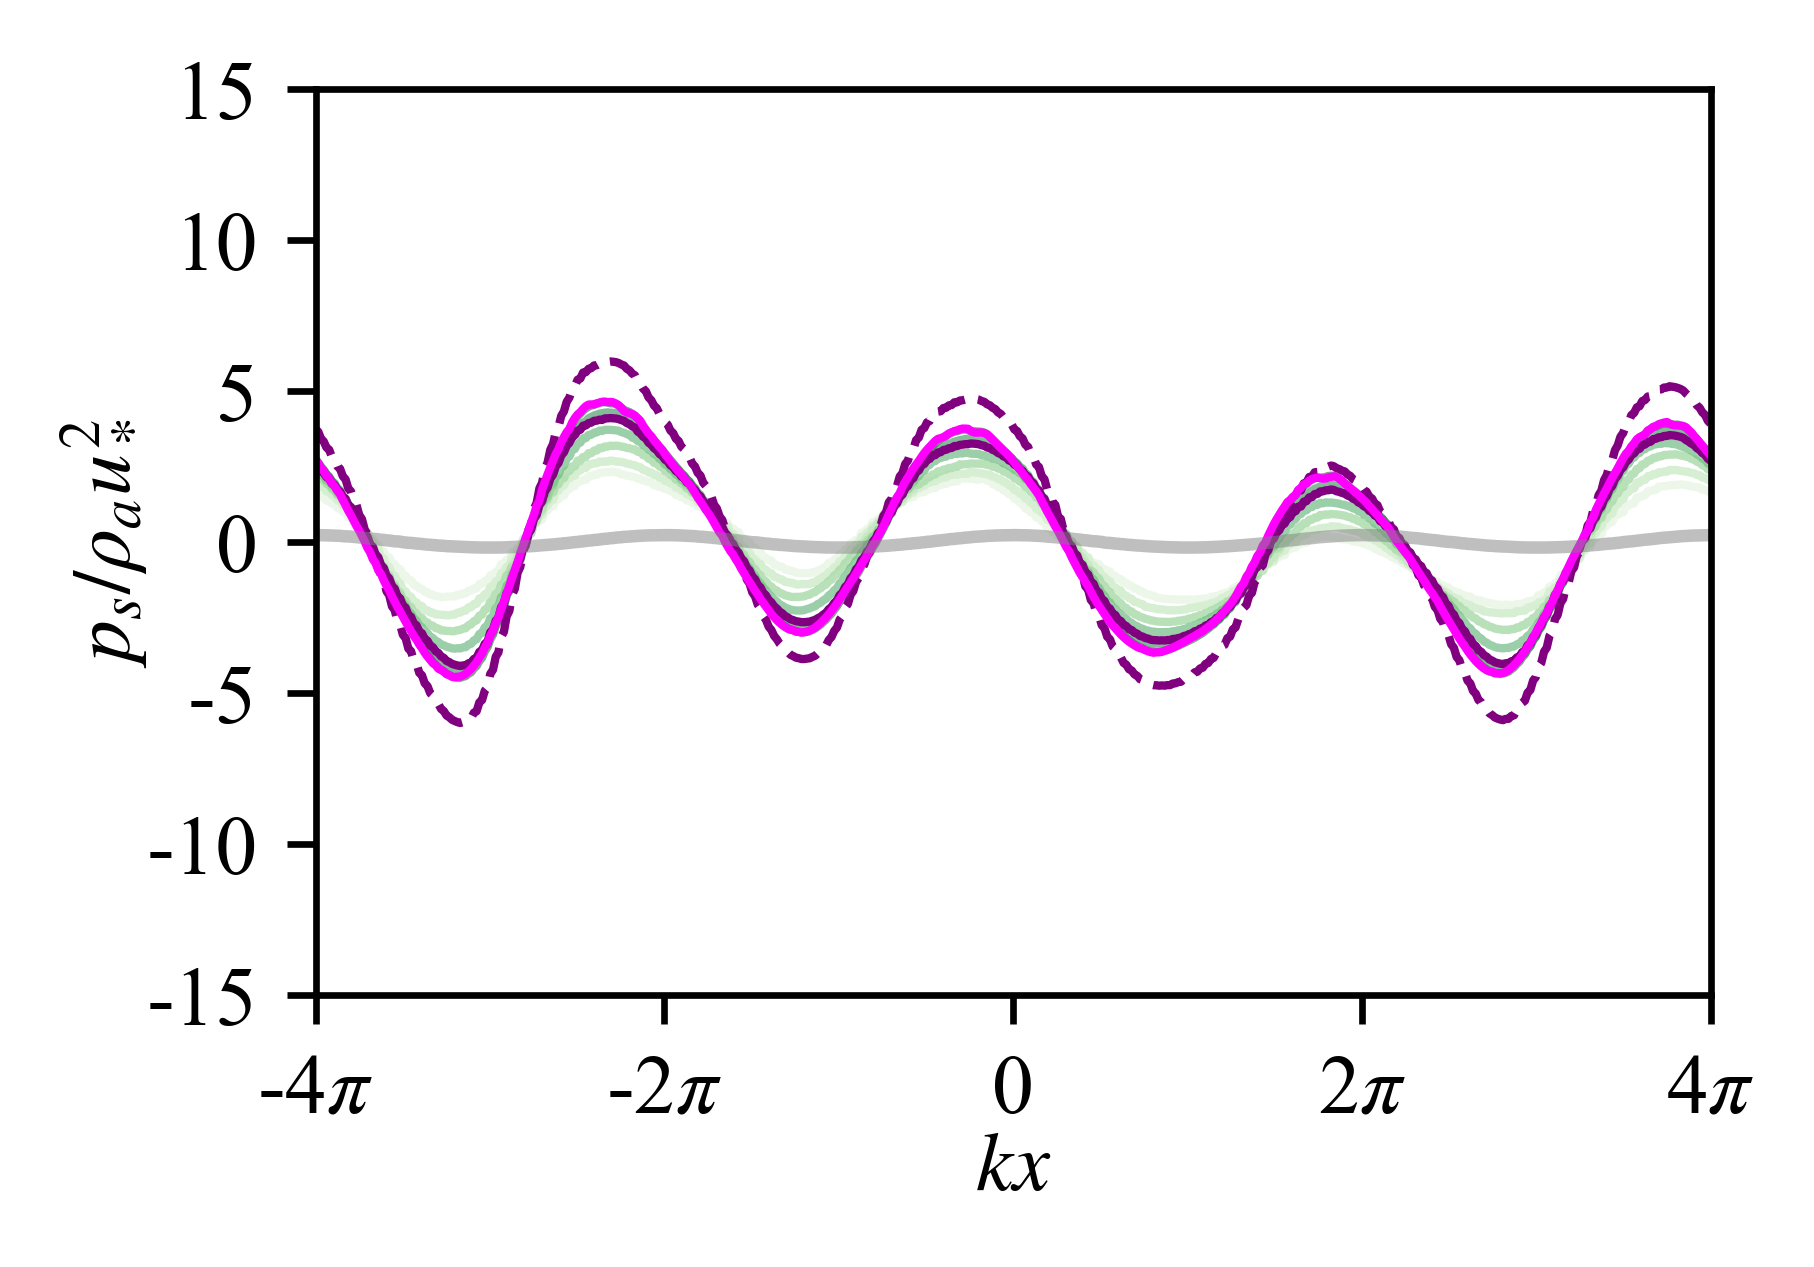

In [475]:
""" FIGURE: Show the 1D distribution of pressure at different height. """
fig = plt.figure(figsize = [3,2]); ax = plt.gca()
xarray = np.linspace(-np.pi, np.pi, 512)*4

case = case5
tindex = 10
eta = np.roll(np.average(case.phase['eta'][tindex], axis=0), -case.phase['idx'][tindex], axis=0) - 1 # Last frame of eta
p2D_interp, zgrid = array_newcoord(case.p['p_2D'][tindex], case=case, eta=eta)

""" Instantanous """
for i in range (0,6):
    plt.plot(xarray, (p2D_interp[:,85+i*5]-np.average(p2D_interp[:,85+i*5]))/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/6), lw=1, alpha=0.5)
    
""" Sample as Donelan 2006. """
p2D_sample, zsample = sampling(case.p['p_2D'][tindex], case=case, hsample=0.08*2*np.pi/case.k, eta=eta)
plt.plot(xarray, (p2D_sample-np.average(p2D_sample))/case.tau0, c='purple', lw=1)
alpha = -1
plt.plot(xarray, (p2D_sample-np.average(p2D_sample))/case.tau0/np.exp(alpha*0.08*2*np.pi)*np.exp(alpha*0.02*2*np.pi), '--', c='purple', lw=1)

p2D_sample, zsample = sampling(case.p['p_2D'][tindex], case=case, hsample=(0.02)*2*np.pi/case.k, eta=eta)
plt.plot(xarray, (p2D_sample-np.average(p2D_sample))/case.tau0, c='magenta', lw=1)

""" Simplified modes. """
# plt.plot(xarray, pfilter/case.tau0, '--', c='magenta', lw=1)

# """ Average """
# for i in range (0,8):
#     plt.plot(xarray, p2D_aver_interp[:,85+i*5]/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/8), lw=1)

plt.plot(xarray, (eta)*case.k*2, c='gray', alpha=0.5)

plt.ylabel(r'$p_s/\rho_a u_*^2$', labelpad=0)
plt.xlabel(r'$kx$', labelpad=0)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-15, -10, -5, 0, 5, 10, 15))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-15,15])
fig.savefig('figures_jfm/pressure_1d_vertical_ak01_CU4.pdf', bbox_inches='tight', pad_inches=0)
fig.savefig('figures_jfm/pressure_1d_vertical_ak01_CU4.eps', bbox_inches='tight', pad_inches=0)

(-5.149960319306146e-18+0j) (-5.149960319306146e-18+0j)
(0.08150144400476363+0.09502942682347915j) (0.08150144400476363+0.09502942682347915j)
(0.08150144400476363-0.09502942682347916j) (0.08150144400476363-0.09502942682347916j)


Text(0, 0.5, '$2P(k_x)$')

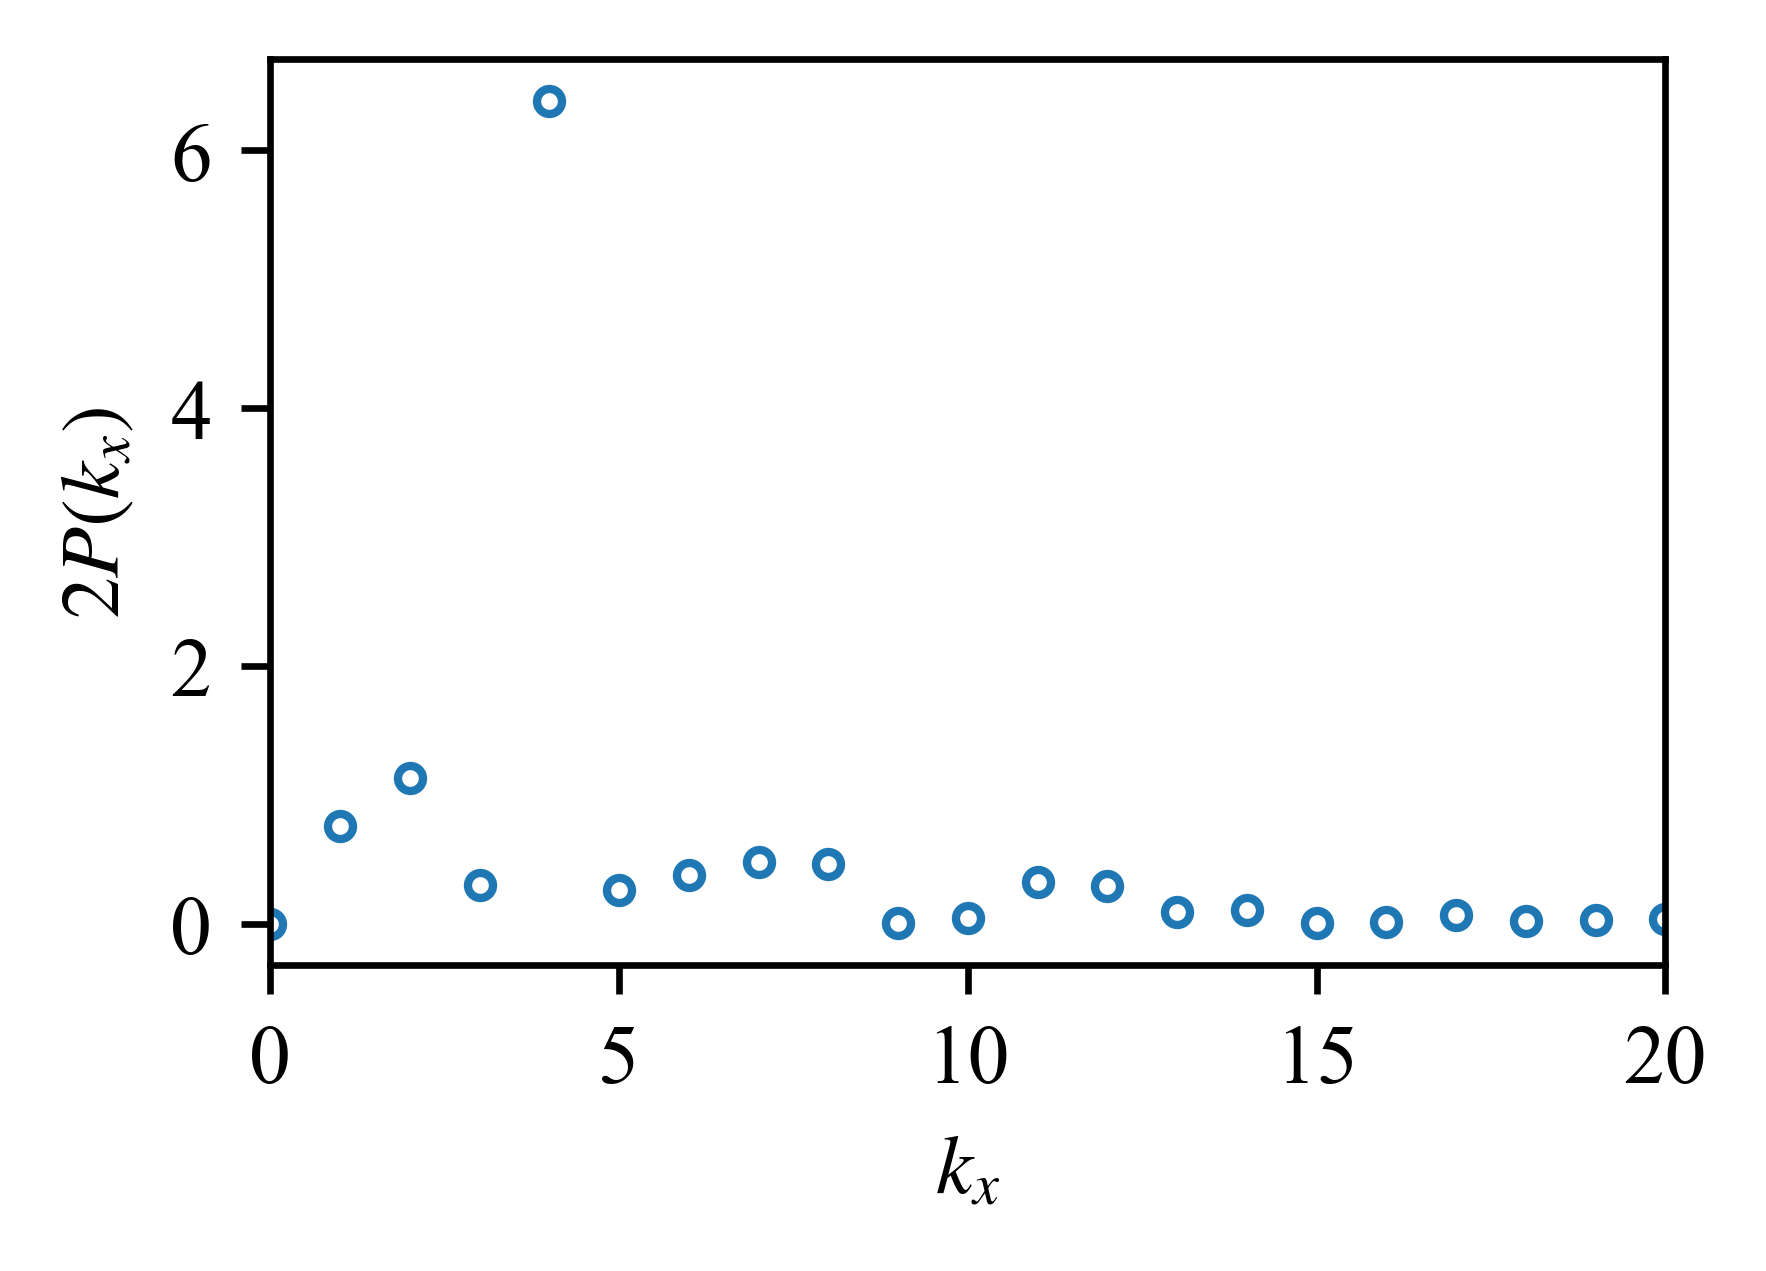

In [476]:
""" PROCESSING: fourier transform. Can we get pamp from this instead of max - min? """
from scipy.fft import fft, fftfreq, ifft
import copy
import cmath

fig = plt.figure(figsize=[3,2])
spectrum = np.fft.fft(p2D_sample-np.average(p2D_sample))  
# spectrum = np.fft.fftn(p2D_interp[:,85]-np.average(p2D_interp[:,85]))  
xf = fftfreq(512, 1/512)
plt.plot(xf, 2*np.abs(spectrum)/512/case.tau0, marker='o', mfc='none', lw=0, markersize=3)

""" Filter out the k=4 components. """
spectrumfilter = np.zeros(np.size(spectrum), dtype=complex)
# keeplist = (0,1,2,4,8,12,-1,-2,-4,-8,-12)
keeplist = (0,4,-4)
for i in keeplist:
    spectrumfilter[i] = complex(spectrum[i].real, spectrum[i].imag)
    print(spectrumfilter[i], spectrum[i])
pfilter = np.fft.ifft(spectrumfilter)
plt.xlim([0, 20])
plt.xlabel('$k_x$'); plt.ylabel('$2P(k_x)$')
# fig.savefig('figures_jfm/p_spectrum_cu1_t20.pdf', bbox_inches='tight', pad_inches=0.1)

(-15.0, 15.0)

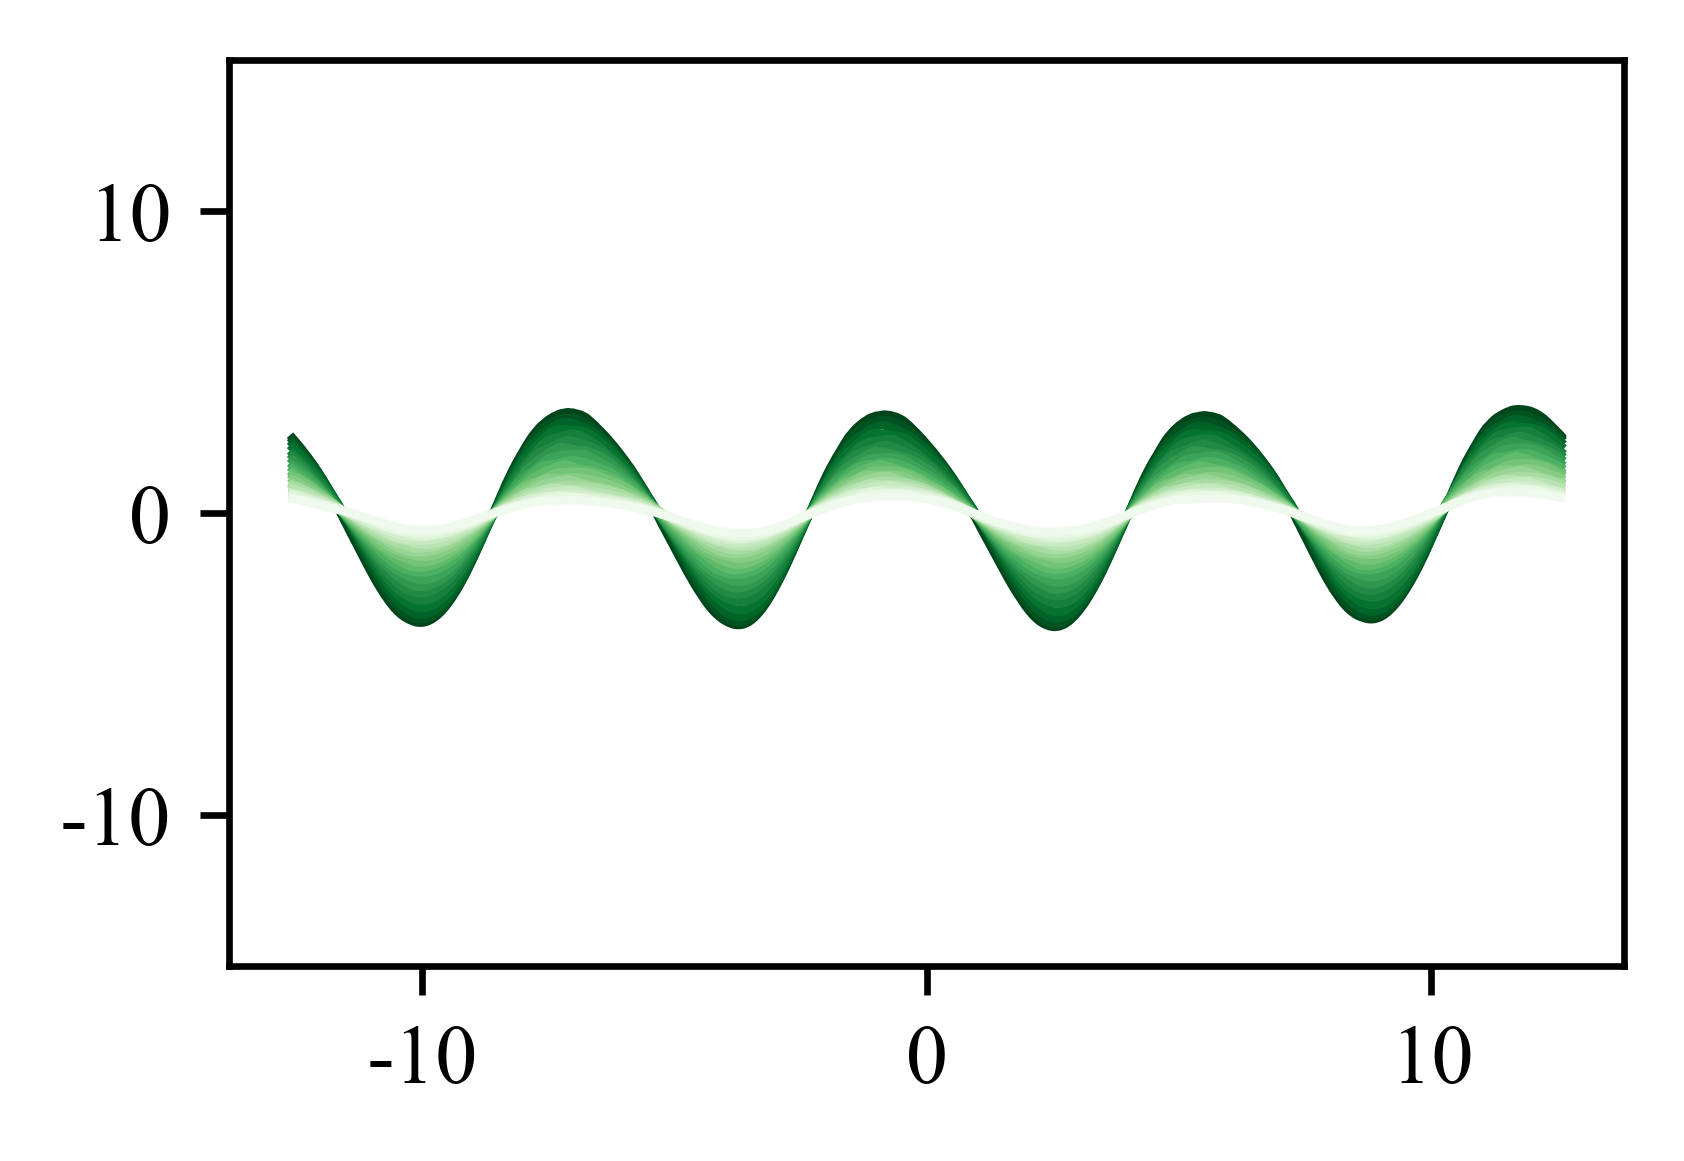

In [143]:
""" PROCESSING: Fourier transform with height """
fig = plt.figure(figsize=[3,2]); ax=plt.gca()
case = case5
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
xarray = np.linspace(-np.pi, np.pi, 512)*4
np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
for i in range(0,20):
    height = (0.02*(i+2))*2*np.pi/case.k
    p2D_sample, zsample = sampling(p2D_aver, case=case, hsample=height, eta=eta)    
    plt.plot(xarray, (p2D_sample-np.average(p2D_sample))/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/20), lw=1)
# ax.set_xlim([-4*np.pi,4*np.pi])
ax.set_ylim([-15,15])

Text(0, 0.5, '$2P(k_x)$')

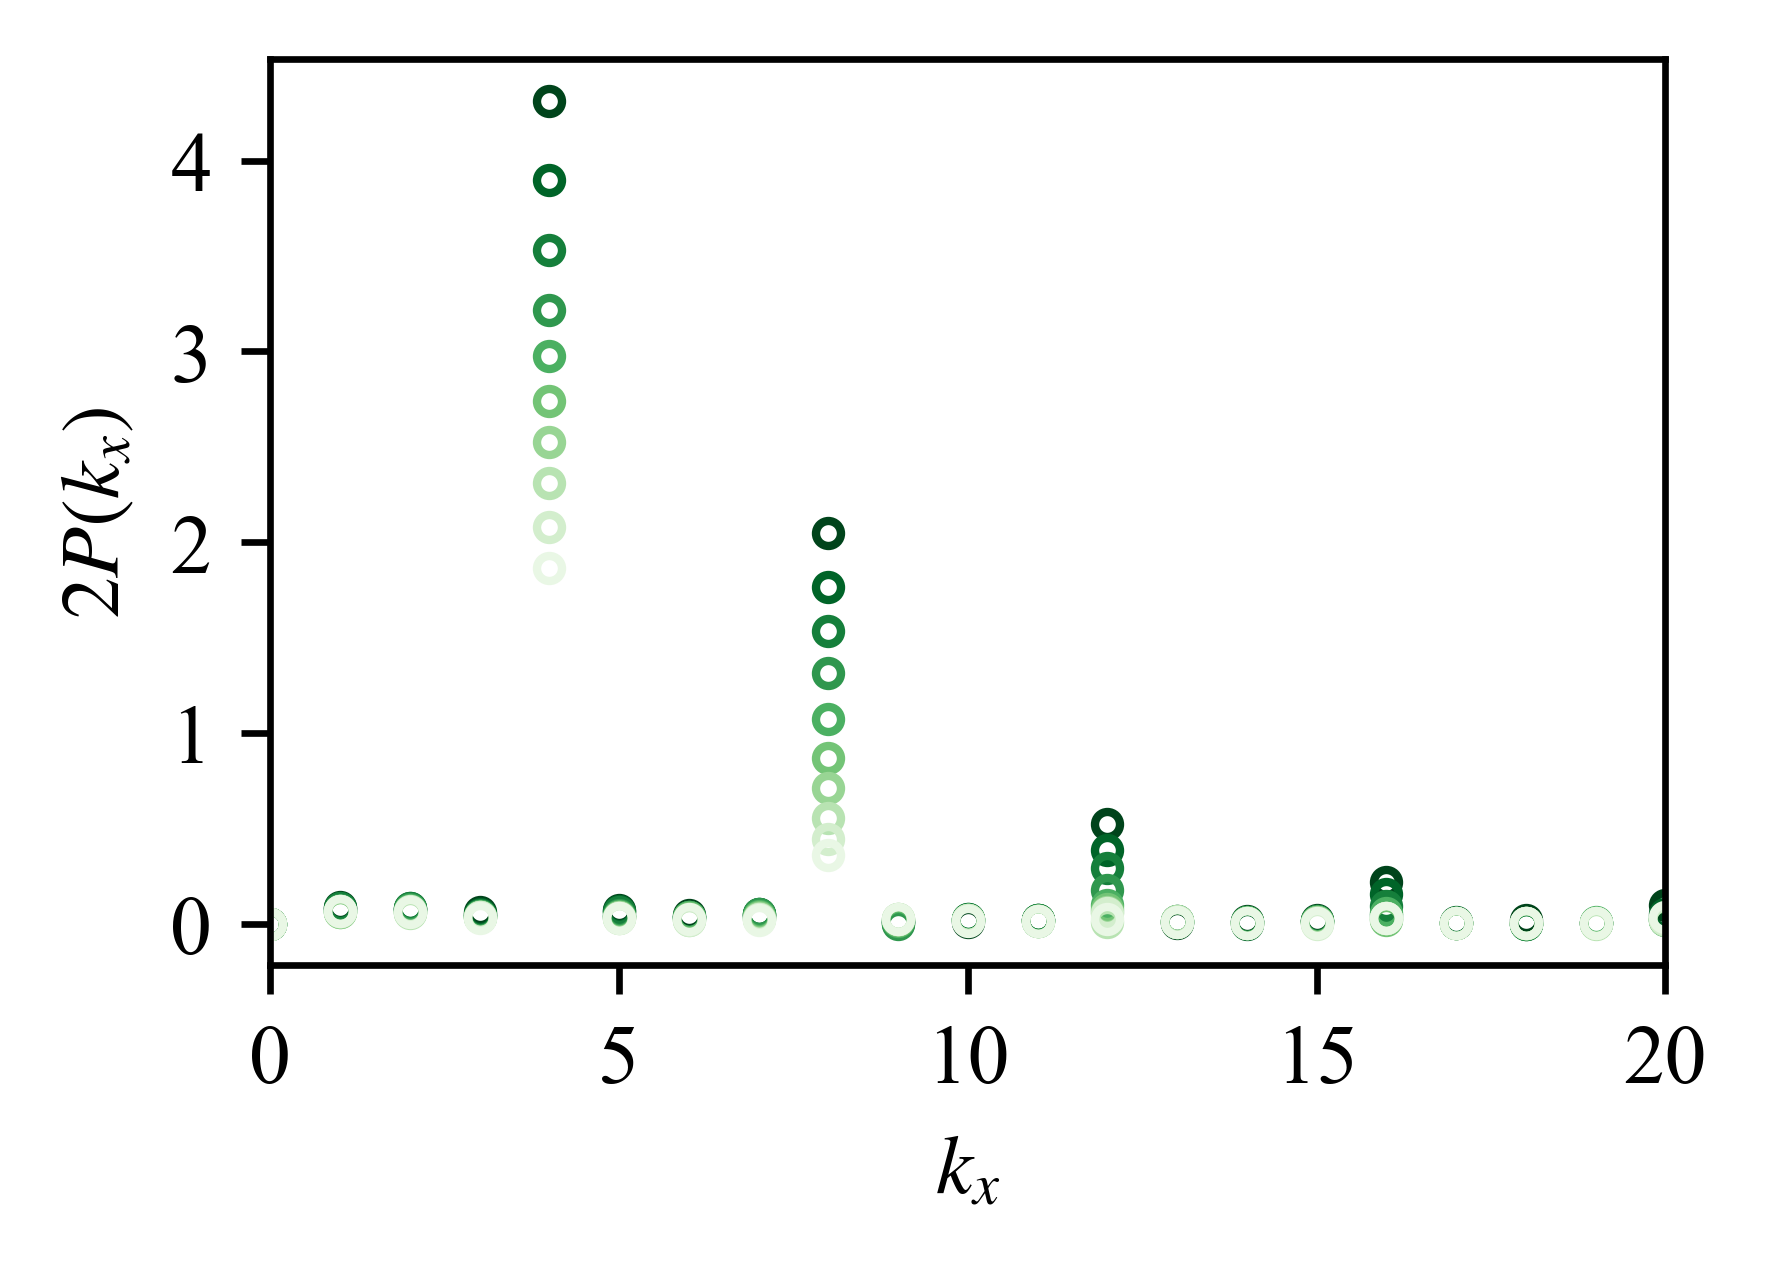

In [129]:
from scipy.fft import fft, fftfreq, ifft
fig = plt.figure(figsize=[3,2]); ax=plt.gca()
case = case1
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
xarray = np.linspace(-np.pi, np.pi, 512)*4
np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
xf = fftfreq(512, 1/512)
for i in range(0,10):
    height = (0.02*(i+2))*2*np.pi/case.k
    p2D_sample, zsample = sampling(p2D_aver, case=case, hsample=height, eta=eta)    
    spectrum = np.fft.fft(p2D_sample-np.average(p2D_sample))  
    # spectrum = np.fft.fftn(p2D_interp[:,85]-np.average(p2D_interp[:,85]))  
    plt.plot(xf, 2*np.abs(spectrum)/512/case.tau0, marker='o', mfc='none', lw=0, markersize=3, c=plt.cm.get_cmap('Greens')(1-i/10))
# ax.set_xlim([-4*np.pi,4*np.pi])
plt.xlim([0, 20])
plt.xlabel('$k_x$'); plt.ylabel('$2P(k_x)$')

Text(0, 0.5, '$\\phi(k_x)$')

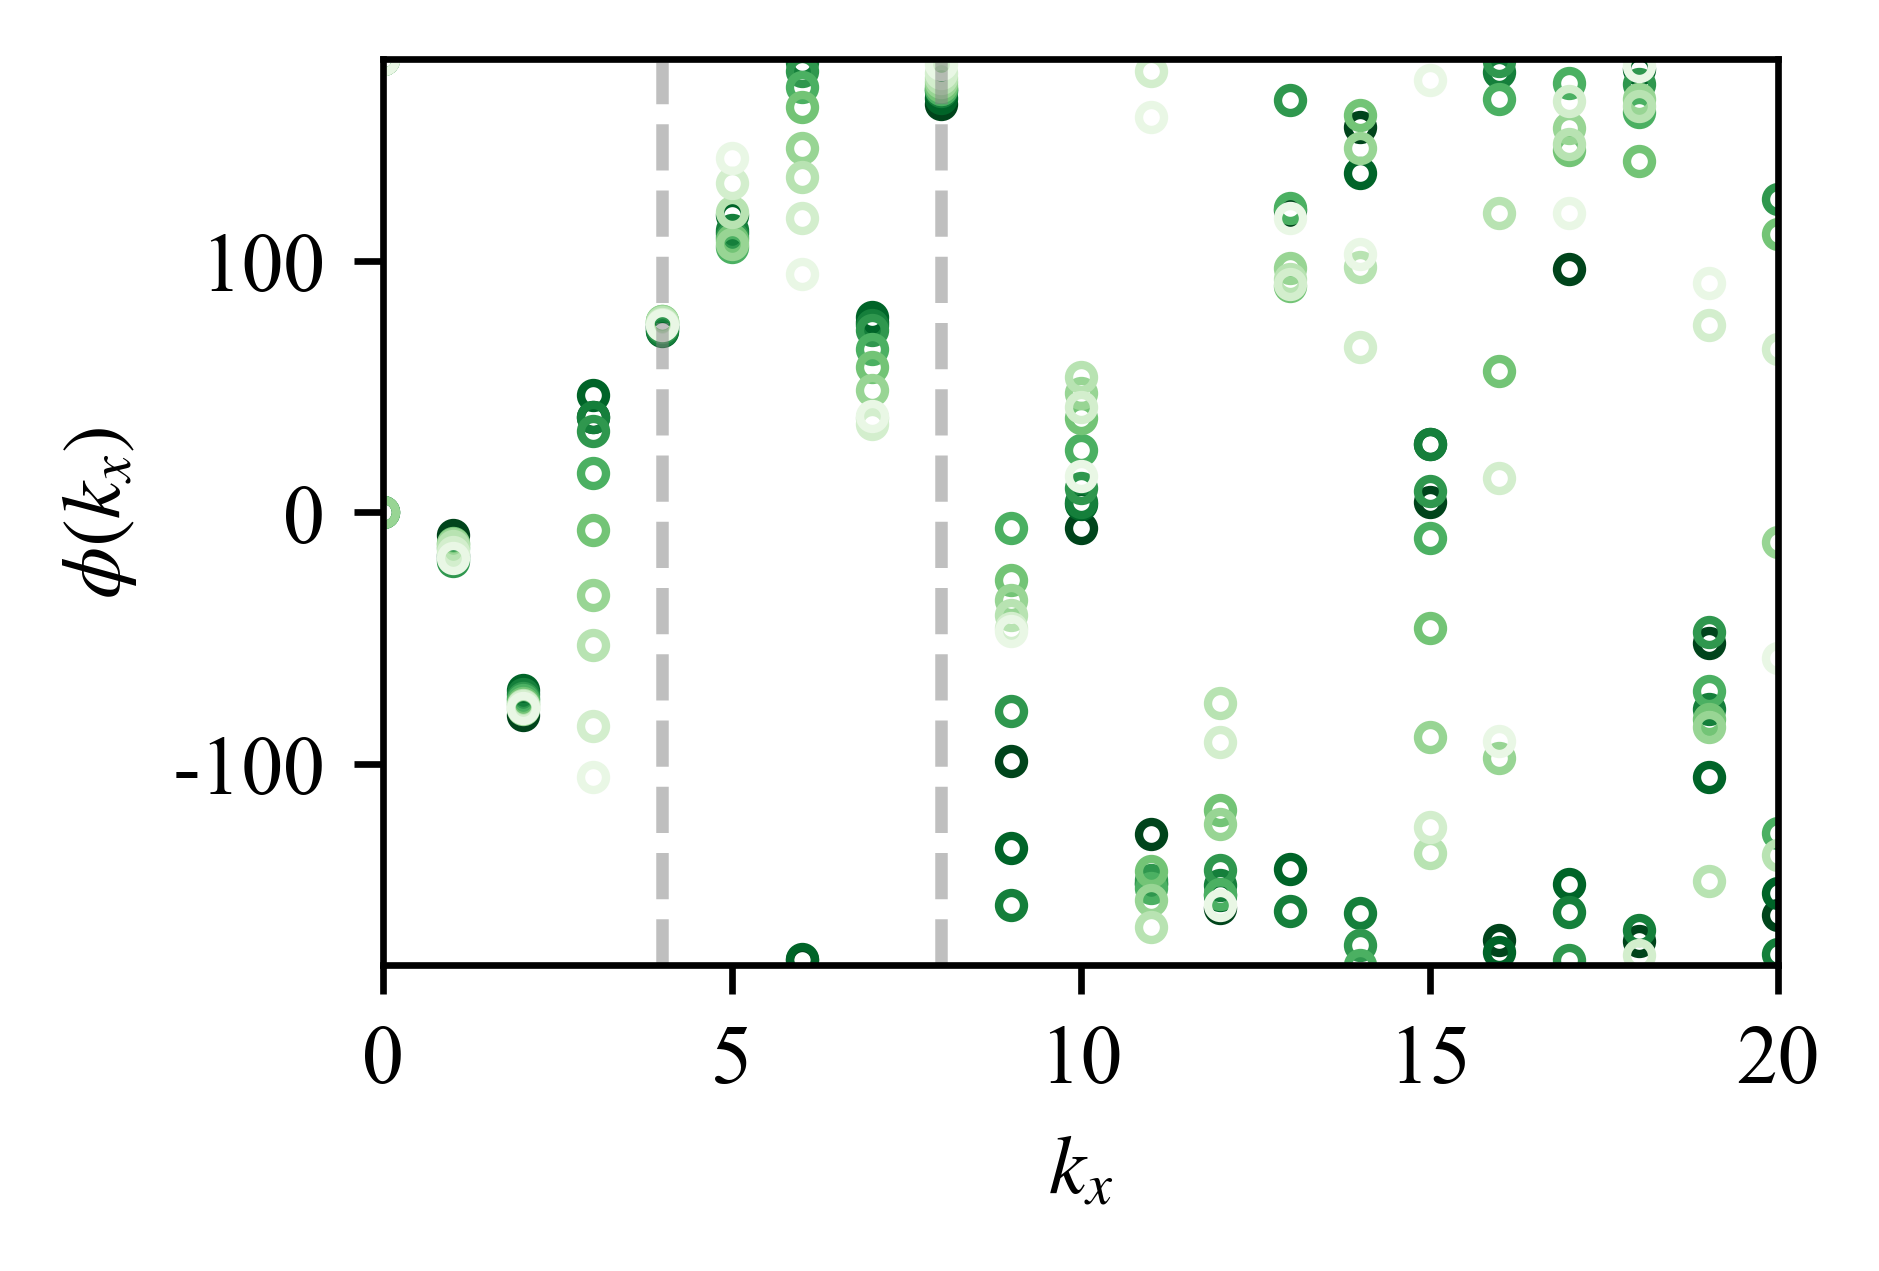

In [137]:
from scipy.fft import fft, fftfreq, ifft
fig = plt.figure(figsize=[3,2]); ax=plt.gca()
case = case1
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
xarray = np.linspace(-np.pi, np.pi, 512)*4
np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
xf = fftfreq(512, 1/512)
for i in range(0,10):
    height = (0.02*(i+2))*2*np.pi/case.k
    p2D_sample, zsample = sampling(p2D_aver, case=case, hsample=height, eta=eta)    
    spectrum = np.fft.fft(p2D_sample-np.average(p2D_sample))  
    # spectrum = np.fft.fftn(p2D_interp[:,85]-np.average(p2D_interp[:,85]))  
    plt.plot(xf, np.angle(spectrum)/np.pi/2*360, marker='o', mfc='none', lw=0, markersize=3, c=plt.cm.get_cmap('Greens')(1-i/10))
# ax.set_xlim([-4*np.pi,4*np.pi])
plt.xlim([0, 20])
plt.ylim([-180, 180])
plt.plot(np.ones(360)*4,np.arange(-180,180),'--', c='gray',alpha=0.5)
plt.plot(np.ones(360)*8,np.arange(-180,180),'--', c='gray',alpha=0.5)
plt.xlabel('$k_x$'); plt.ylabel('$\phi(k_x)$')

Text(0, 0.5, '$2P(k_x)$')

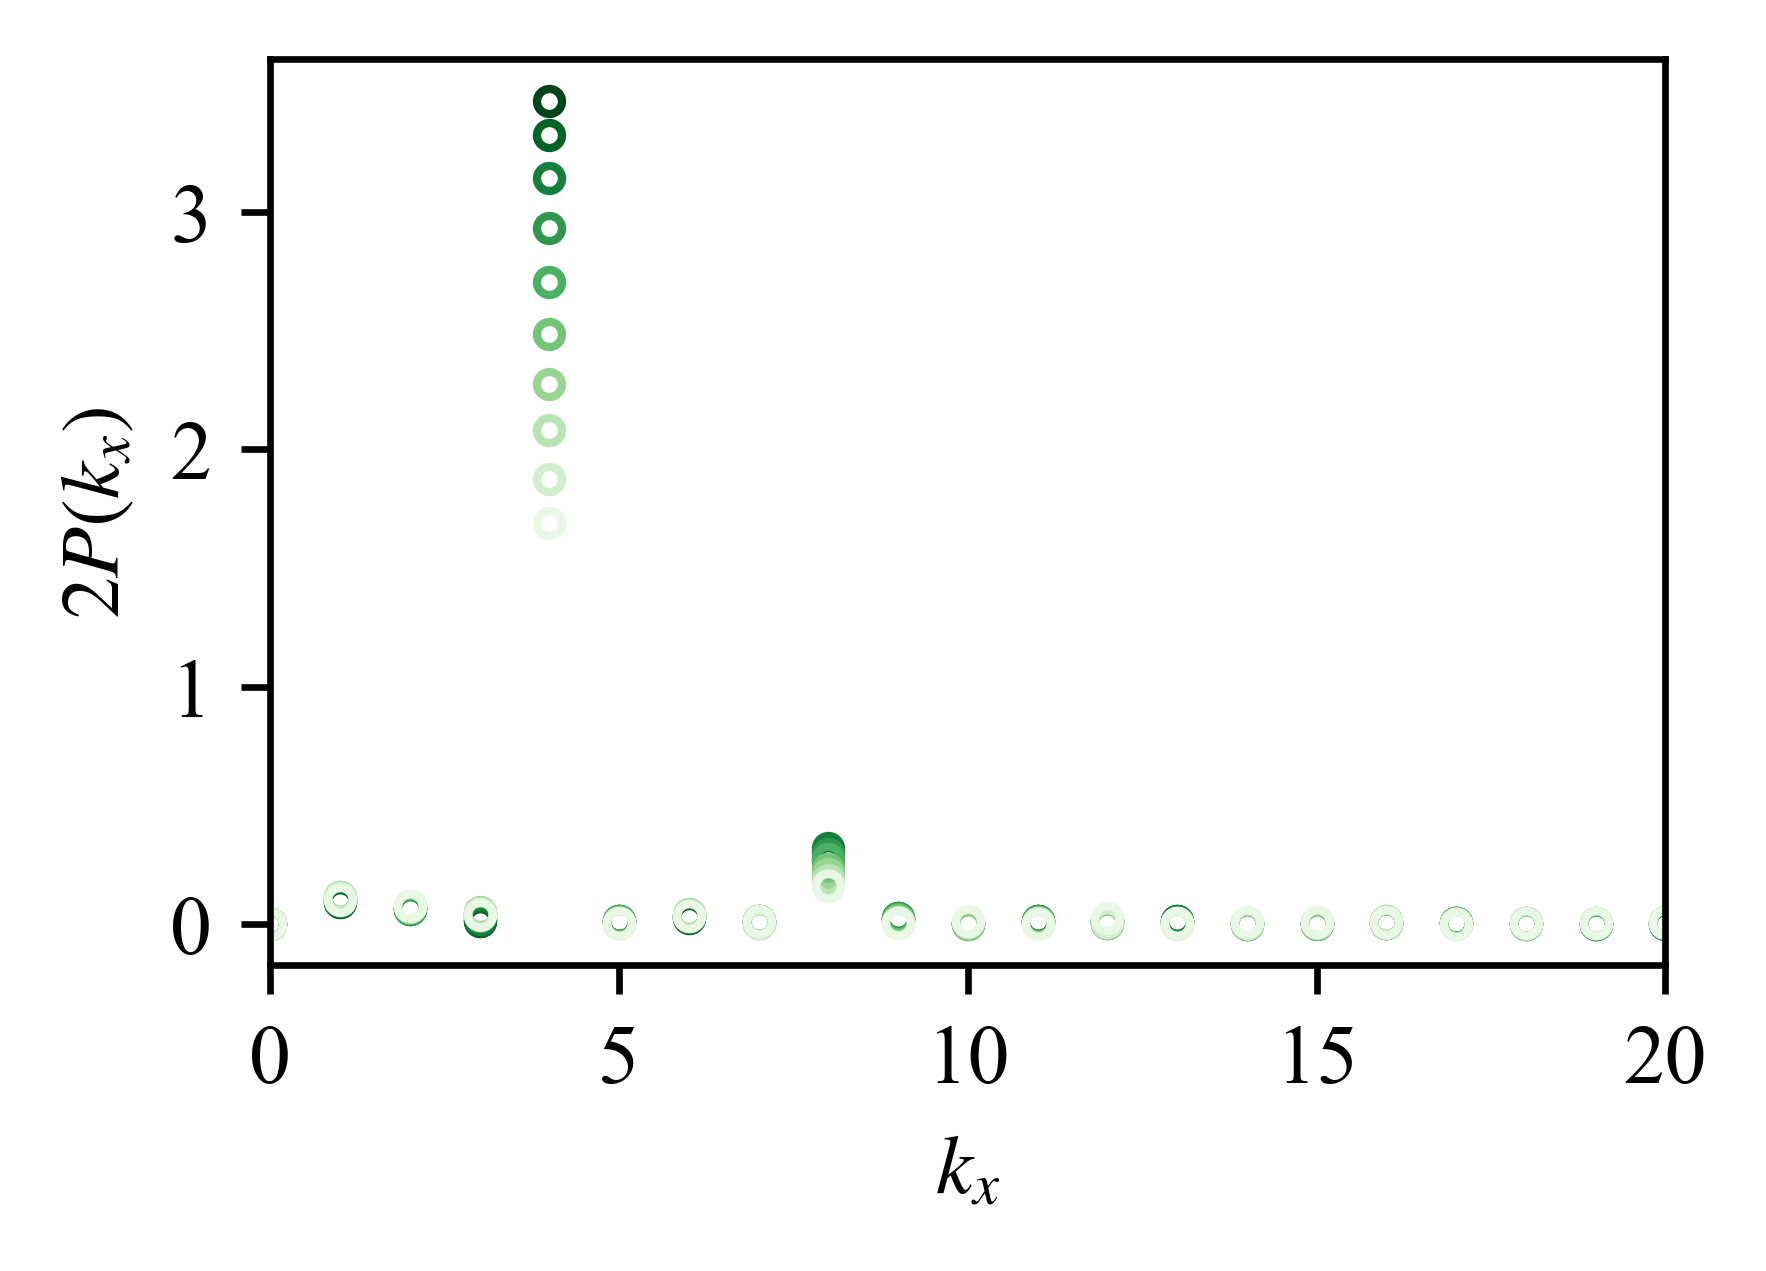

In [140]:
from scipy.fft import fft, fftfreq, ifft
fig = plt.figure(figsize=[3,2]); ax=plt.gca()
case = case5
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
xarray = np.linspace(-np.pi, np.pi, 512)*4
np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
xf = fftfreq(512, 1/512)
for i in range(0,10):
    height = (0.02*(i+2))*2*np.pi/case.k
    p2D_sample, zsample = sampling(p2D_aver, case=case, hsample=height, eta=eta)    
    spectrum = np.fft.fft(p2D_sample-np.average(p2D_sample))  
    # spectrum = np.fft.fftn(p2D_interp[:,85]-np.average(p2D_interp[:,85]))  
    plt.plot(xf, 2*np.abs(spectrum)/512/case.tau0, marker='o', mfc='none', lw=0, markersize=3, c=plt.cm.get_cmap('Greens')(1-i/10))
# ax.set_xlim([-4*np.pi,4*np.pi])
plt.xlim([0, 20])
plt.xlabel('$k_x$'); plt.ylabel('$2P(k_x)$')

Text(0, 0.5, '$\\phi(k_x)$')

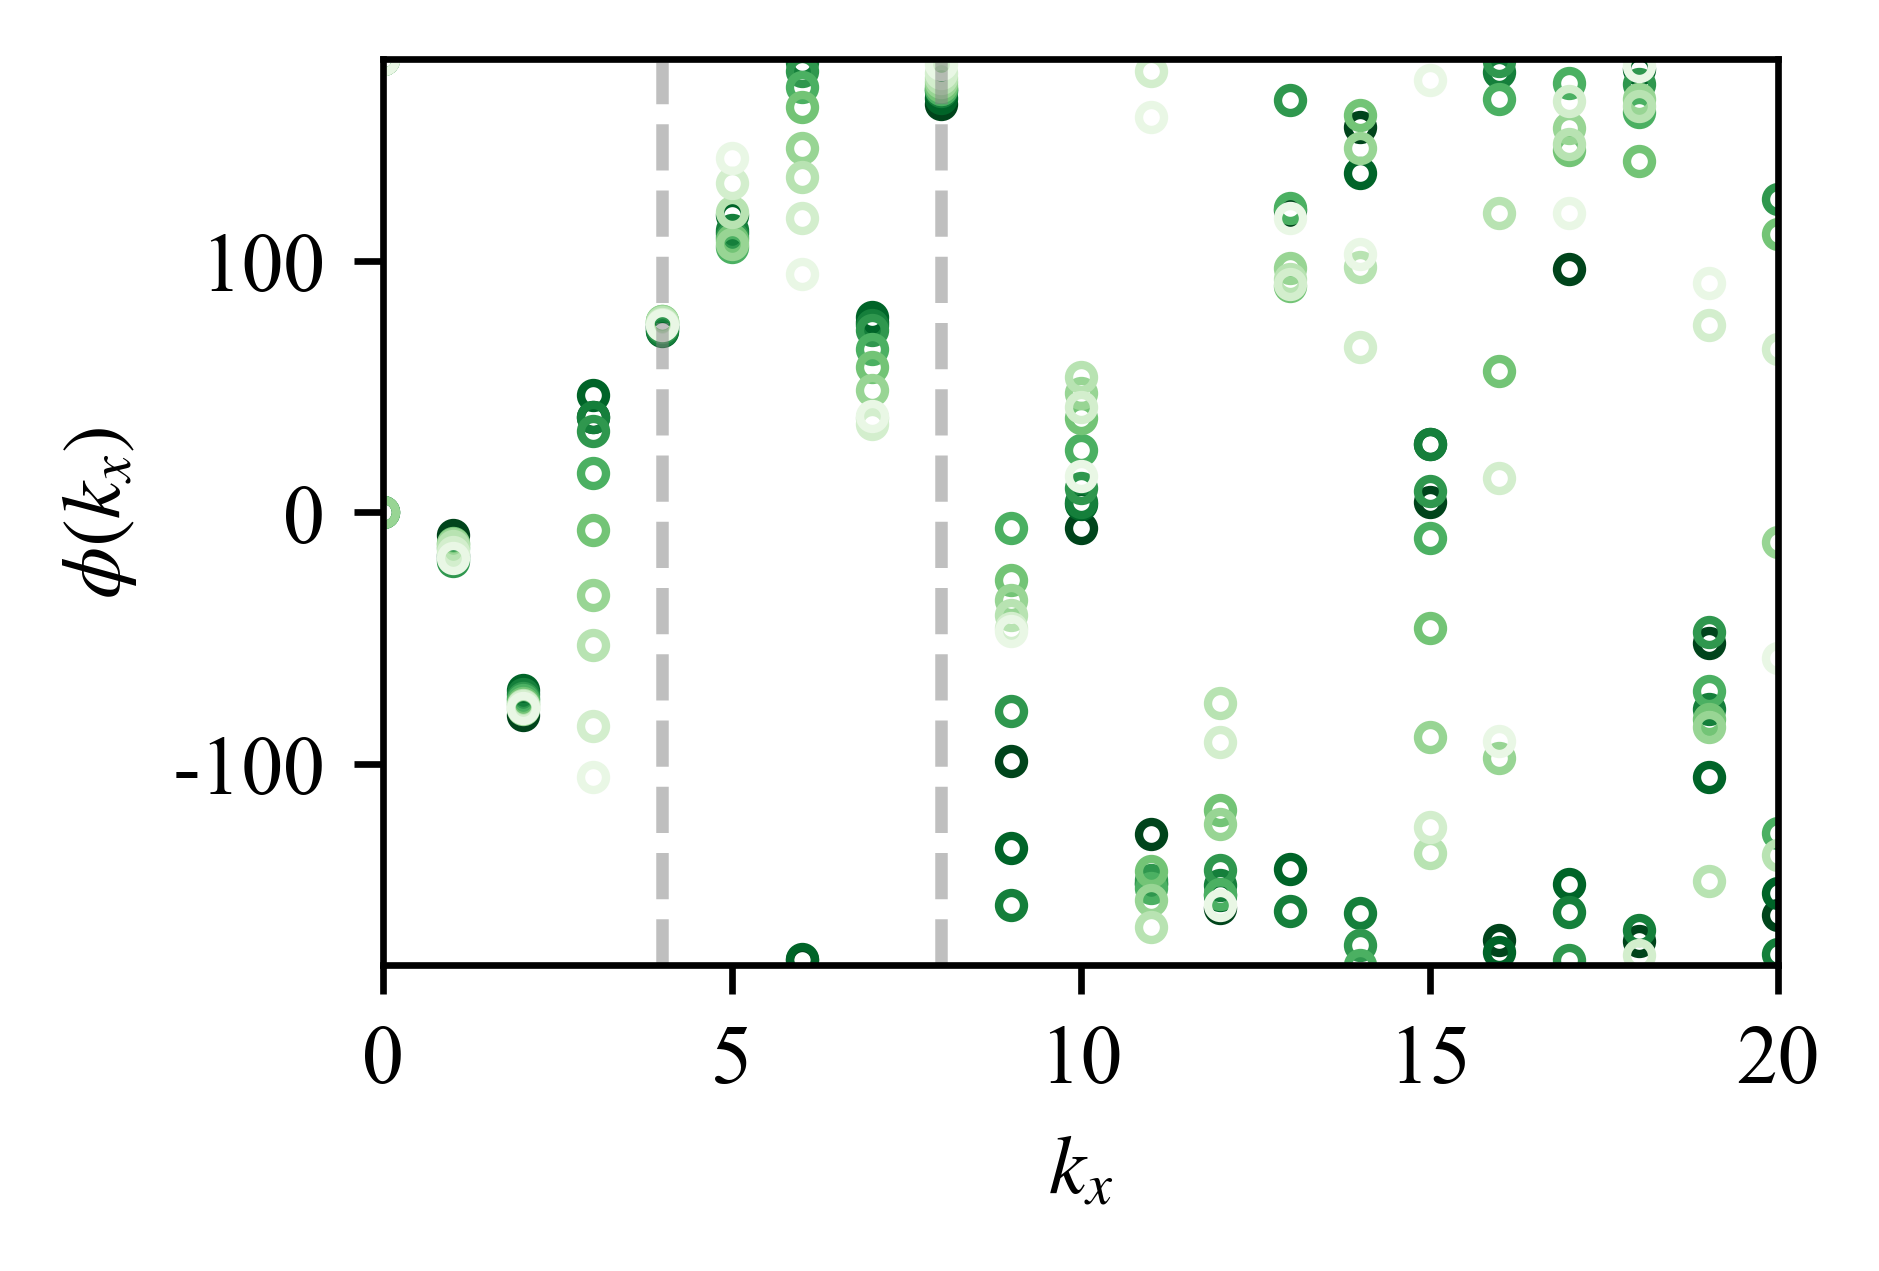

In [141]:
from scipy.fft import fft, fftfreq, ifft
fig = plt.figure(figsize=[3,2]); ax=plt.gca()
case = case1
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
xarray = np.linspace(-np.pi, np.pi, 512)*4
np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
xf = fftfreq(512, 1/512)
for i in range(0,10):
    height = (0.02*(i+2))*2*np.pi/case.k
    p2D_sample, zsample = sampling(p2D_aver, case=case, hsample=height, eta=eta)    
    spectrum = np.fft.fft(p2D_sample-np.average(p2D_sample))  
    # spectrum = np.fft.fftn(p2D_interp[:,85]-np.average(p2D_interp[:,85]))  
    plt.plot(xf, np.angle(spectrum)/np.pi/2*360, marker='o', mfc='none', lw=0, markersize=3, c=plt.cm.get_cmap('Greens')(1-i/10))
# ax.set_xlim([-4*np.pi,4*np.pi])
plt.xlim([0, 20])
plt.ylim([-180, 180])
plt.plot(np.ones(360)*4,np.arange(-180,180),'--', c='gray',alpha=0.5)
plt.plot(np.ones(360)*8,np.arange(-180,180),'--', c='gray',alpha=0.5)
plt.xlabel('$k_x$'); plt.ylabel('$\phi(k_x)$')

### Fitting the Belcher formula

In [272]:
def beta_us (Ui, Um, C, beta):
    return -2*((Um-C)/(Ui-C))**2*(C/Ui) - beta

from scipy.optimize import fsolve
for case in (case1,case2,case3,case4,case5,case6,case7,case8):
    case.beta = -np.sin(np.average(case.dphase)/128*2*np.pi)*case.Um**2
    case.Ui = fsolve(beta_us, 5, args=(case.Um, case.wave.c/case.ustar, case.beta))[0]
    print(case.Ui)

2.75378458951367
4.387793562204529
6.7457060823220765
2.6616884590349024
4.533715679918788
7.059908717868893
2.744678491662572
4.535805306638606


### Compare with interfacial results? (To-do)

In [ ]:
case = case1
case.t = np.array(case.t)

for j in range(0, np.size(case.t)):
    case.interface[j].stress(case.tau0,case.nu_a)

# List comprehension
formdrag_all = [interface.formdrag for interface in case.interface]
p1d_all = [np.roll(np.average(interface.p/case.tau0, axis=0), -(interface.idx), axis=0) for interface in case.interface]
idx = [interface.idx for interface in case.interface]

case.isample = []
# Ensemble average of different time
p1d_t = []; tau1d_t = []; formdrag_t = []
for j in tqdm(range (2,30,2)):
    p1d_winaver = []; tau1d_winaver = []; formdrag_winaver = []
    case.isample.append(j)
    # Average over 5 time around the center t
    for i in range(j-2,j+3):
        interface = case.interface[i]
        p1d = np.average(interface.p/case.tau0, axis=0)
        p1d_shift = np.roll(p1d, -(interface.idx), axis=0)
        p1d_winaver.append(p1d_shift)
        tau1d = np.average(interface.tau_nux/case.tau0, axis=0)
        tau1d_shift = np.roll(tau1d, -(interface.idx), axis=0)
        tau1d_winaver.append(tau1d_shift)
        formdrag_winaver.append(interface.formdrag)
        
    p1d_t.append(np.average(p1d_winaver, axis=0))
    tau1d_t.append(np.average(tau1d_winaver, axis=0))
    formdrag_t.append(np.average(formdrag_winaver, axis=0))

case.isample = np.array(case.isample)